In [1]:
# coding: utf-8

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib import mlab
from sklearn.decomposition import PCA

In [3]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.sql import types as T
from pyspark.sql import functions as F
from pyspark.conf import SparkConf
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import PCA
from pyspark.ml.regression import LinearRegression
from pyspark.mllib.stat import Statistics

import multiprocessing

In [4]:
# create SparkContext and SparkSession to process files
cores = multiprocessing.cpu_count() - 2

conf = SparkConf()
conf.setMaster('local[' + str(cores) + ']') \
    .setAppName('example') \
    .set('spark.driver.memory', '4g')    
#    .set('spark.serializer', 'org.apache.spark.serializer.KryoSerializer') \


sc = SparkContext(conf=conf)
spark = SparkSession(sc)

In [5]:
my_seed = 1980

In [6]:
# dataframe
df = spark.read.format('csv') \
               .option('sep', ',') \
               .option('header', 'True') \
               .option('inferSchema', 'True') \
               .load('../data/df.csv')
df = df.drop('id')                
# df.createOrReplaceTempView("tab_df")
df.cache()

DataFrame[cargo_analista: double, cargo_consultor: double, cargo_engenheiro: double, cargo_estagiario: double, cargo_gerente: double, casado: int, curso_administracao: double, curso_computacao: double, curso_engenharia: double, experiencia_meses: int, homem: double, idade: int, idioma-de-escreve: double, idioma-de-fala: double, idioma-de-le: double, idioma-en-escreve: double, idioma-en-fala: double, idioma-en-le: double, idioma-eo-fala: double, idioma-es-escreve: double, idioma-es-fala: double, idioma-es-le: double, idioma-fr-escreve: double, idioma-fr-fala: double, idioma-fr-le: double, idioma-he-fala: double, idioma-it-escreve: double, idioma-it-fala: double, idioma-it-le: double, idioma-ja-escreve: double, idioma-ja-fala: double, idioma-ja-le: double, idioma-nativo-en: double, idioma-nativo-es: double, idioma-nativo-pt: double, idioma-pt-escreve: double, idioma-pt-fala: double, idioma-pt-le: double, idioma-ru-escreve: double, idioma-ru-fala: double, idioma-ru-le: double, idioma-tota

In [7]:
df_rdd = df.rdd.map(tuple)

In [8]:
pearsonCorr = Statistics.corr(df_rdd)

print(pearsonCorr)

[[ 1.         -0.02242059  0.00280792 ...,  0.02427632  0.14261987
  -0.03874226]
 [-0.02242059  1.         -0.00608486 ...,  0.03288884  0.23303626
   0.33850366]
 [ 0.00280792 -0.00608486  1.         ...,  0.00435769  0.00632727
  -0.00943161]
 ..., 
 [ 0.02427632  0.03288884  0.00435769 ...,  1.          0.09544825
   0.07555622]
 [ 0.14261987  0.23303626  0.00632727 ...,  0.09544825  1.          0.07367803]
 [-0.03874226  0.33850366 -0.00943161 ...,  0.07555622  0.07367803  1.        ]]


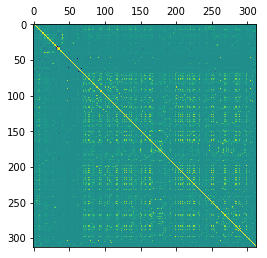

In [9]:
plt.matshow(pearsonCorr)
plt.show()

In [10]:
# verificando correlacao entre variaveis explicativas e alvo
corr_pd = pd.DataFrame(pearsonCorr, columns=df.columns)
np.abs(corr_pd['label']).sort_values(ascending=False)[:15]

44     1.000000
311    0.078548
3      0.038930
89     0.028120
197    0.024948
149    0.024948
184    0.024268
265    0.023521
134    0.023431
72     0.023406
118    0.022994
202    0.022455
9      0.022451
70     0.022327
222    0.021929
Name: label, dtype: float64

In [11]:
# verificando multicolinearidade
matrix = corr_pd.as_matrix()
size = matrix.shape[0]

In [13]:
size == df.count()

False

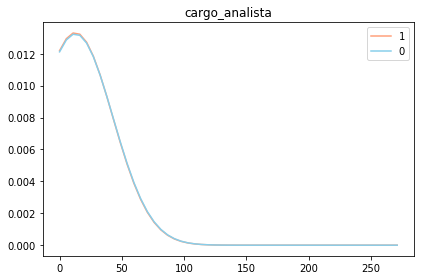

Label = 1 (Mean, Standard-Deviation): (12.6028460543, 29.9397931231)
Label = 0 (Mean, Standard-Deviation): (12.6987471305, 30.1115540041)
p-value: 0.828508777689
Alternative hipothesis rejected



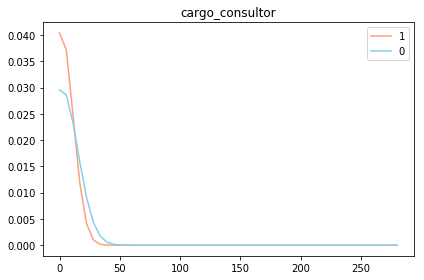

Label = 1 (Mean, Standard-Deviation): (1.36955584304, 9.7846208816)
Label = 0 (Mean, Standard-Deviation): (1.72952580546, 13.3875926473)
p-value: 0.0672684994285
Alternative hipothesis rejected



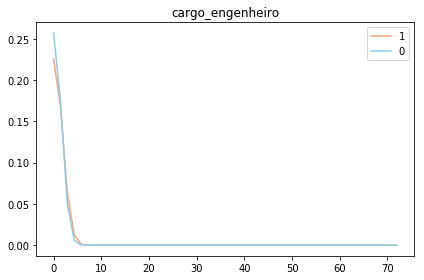

Label = 1 (Mean, Standard-Deviation): (0.0769728331177, 1.76555617127)
Label = 0 (Mean, Standard-Deviation): (0.0736103655821, 1.54933013279)
p-value: 0.88269941392
Alternative hipothesis rejected



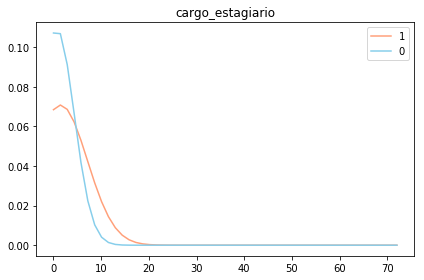

Label = 1 (Mean, Standard-Deviation): (1.46399310047, 5.6343883245)
Label = 0 (Mean, Standard-Deviation): (0.690911842301, 3.65630603946)
p-value: 1.00539802092e-46
Null hipothesis rejected



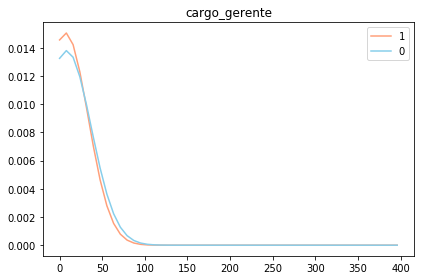

Label = 1 (Mean, Standard-Deviation): (6.89693833549, 26.4666661909)
Label = 0 (Mean, Standard-Deviation): (8.24038134287, 28.8808763056)
p-value: 0.00155404993686
Null hipothesis rejected



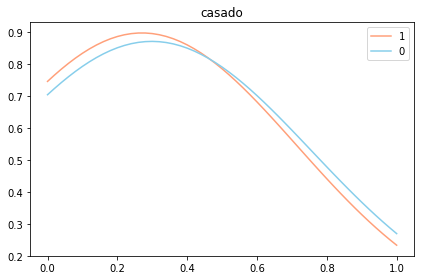

Label = 1 (Mean, Standard-Deviation): (0.270375161708, 0.444153614912)
Label = 0 (Mean, Standard-Deviation): (0.298600943364, 0.457644425276)
p-value: 2.72769523703e-05
Null hipothesis rejected



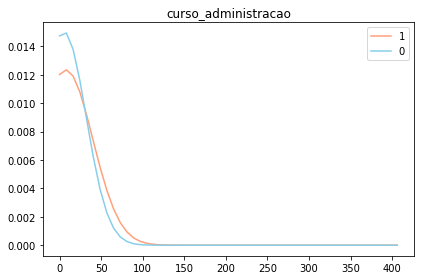

Label = 1 (Mean, Standard-Deviation): (7.56425183269, 32.3098022104)
Label = 0 (Mean, Standard-Deviation): (5.25626548956, 26.5543964298)
p-value: 3.47160399604e-09
Null hipothesis rejected



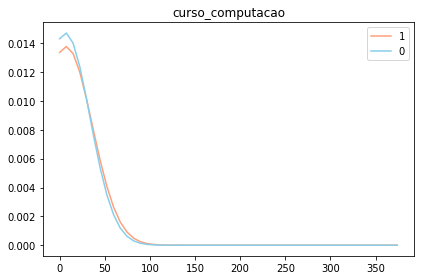

Label = 1 (Mean, Standard-Deviation): (7.17033203967, 28.9589806615)
Label = 0 (Mean, Standard-Deviation): (6.42050617298, 27.0955302257)
p-value: 0.059864237569
Alternative hipothesis rejected



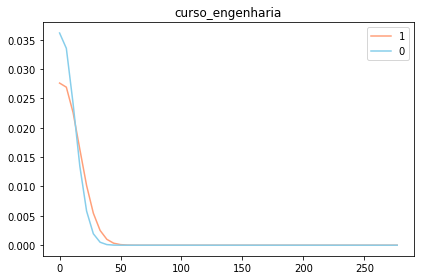

Label = 1 (Mean, Standard-Deviation): (1.82018111255, 14.3280426198)
Label = 0 (Mean, Standard-Deviation): (1.1406206101, 10.9768017066)
p-value: 2.59159474195e-05
Null hipothesis rejected



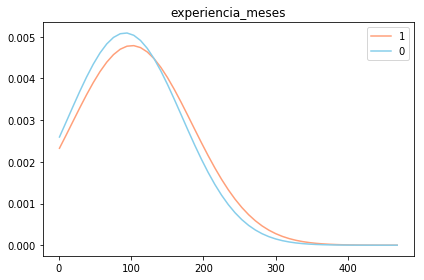

Label = 1 (Mean, Standard-Deviation): (101.112332902, 83.2808240878)
Label = 0 (Mean, Standard-Deviation): (91.9564722073, 78.3257435914)
p-value: 1.88187069175e-15
Null hipothesis rejected



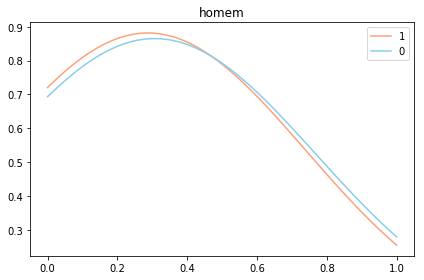

Label = 1 (Mean, Standard-Deviation): (0.287408365675, 0.452553639931)
Label = 0 (Mean, Standard-Deviation): (0.306801128382, 0.461166126256)
p-value: 0.00423397569428
Null hipothesis rejected



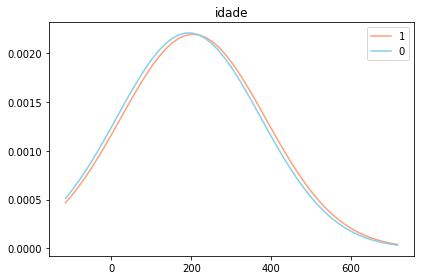

Label = 1 (Mean, Standard-Deviation): (204.647692971, 181.952673532)
Label = 0 (Mean, Standard-Deviation): (193.781651229, 180.783318533)
p-value: 4.35384304467e-05
Null hipothesis rejected



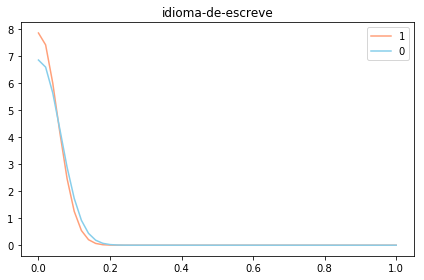

Label = 1 (Mean, Standard-Deviation): (0.0025873221216, 0.050799880766)
Label = 0 (Mean, Standard-Deviation): (0.00339770897338, 0.0581907599805)
p-value: 0.343399293578
Alternative hipothesis rejected



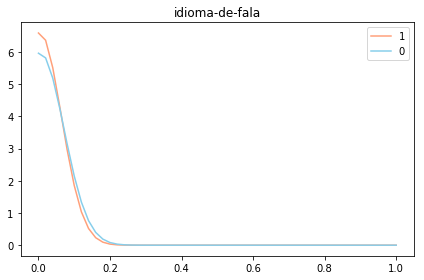

Label = 1 (Mean, Standard-Deviation): (0.00366537300561, 0.060431267125)
Label = 0 (Mean, Standard-Deviation): (0.00447755227903, 0.0667645400241)
p-value: 0.407918755397
Alternative hipothesis rejected



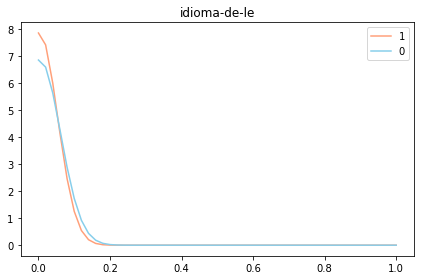

Label = 1 (Mean, Standard-Deviation): (0.0025873221216, 0.050799880766)
Label = 0 (Mean, Standard-Deviation): (0.00339770897338, 0.0581907599805)
p-value: 0.343399293578
Alternative hipothesis rejected



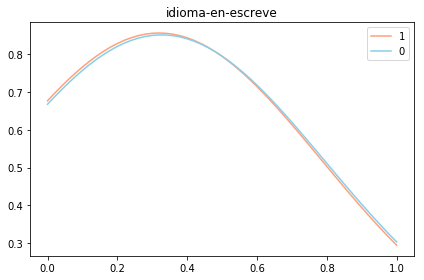

Label = 1 (Mean, Standard-Deviation): (0.319534282018, 0.466296176945)
Label = 0 (Mean, Standard-Deviation): (0.326760241666, 0.469028768981)
p-value: 0.294714128735
Alternative hipothesis rejected



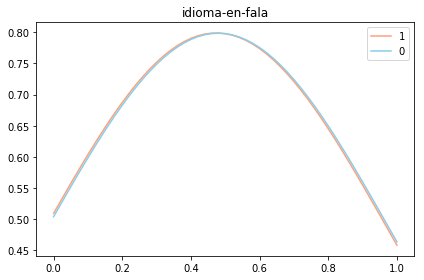

Label = 1 (Mean, Standard-Deviation): (0.47369555843, 0.499307596932)
Label = 0 (Mean, Standard-Deviation): (0.479097522813, 0.499562895387)
p-value: 0.462065839662
Alternative hipothesis rejected



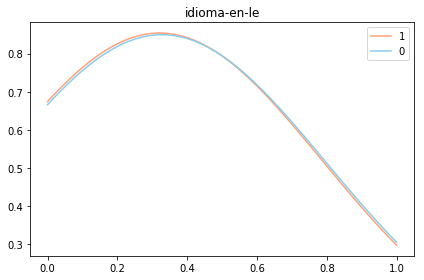

Label = 1 (Mean, Standard-Deviation): (0.321259163433, 0.466960076819)
Label = 0 (Mean, Standard-Deviation): (0.327757854704, 0.469396041082)
p-value: 0.346379008001
Alternative hipothesis rejected



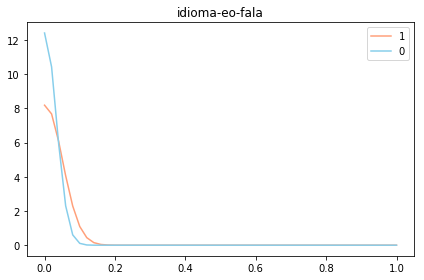

Label = 1 (Mean, Standard-Deviation): (0.0023717119448, 0.0486424395693)
Label = 0 (Mean, Standard-Deviation): (0.00103244669309, 0.0321151171088)
p-value: 0.00463399478555
Null hipothesis rejected



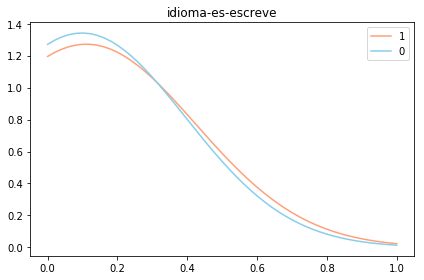

Label = 1 (Mean, Standard-Deviation): (0.110608020699, 0.313646116596)
Label = 0 (Mean, Standard-Deviation): (0.0979813611393, 0.297289444832)
p-value: 0.00387395544041
Null hipothesis rejected



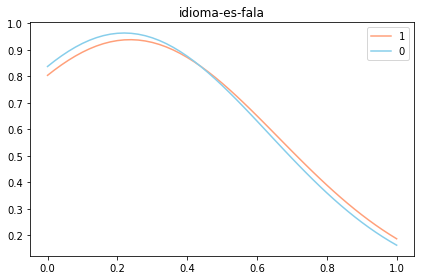

Label = 1 (Mean, Standard-Deviation): (0.23652436395, 0.424947748797)
Label = 0 (Mean, Standard-Deviation): (0.219413195674, 0.413849060936)
p-value: 0.00492529246226
Null hipothesis rejected



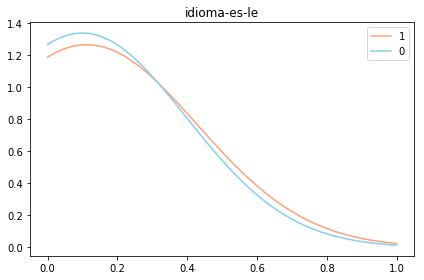

Label = 1 (Mean, Standard-Deviation): (0.112332902113, 0.315775586795)
Label = 0 (Mean, Standard-Deviation): (0.0989789741774, 0.298633783836)
p-value: 0.00235925032493
Null hipothesis rejected



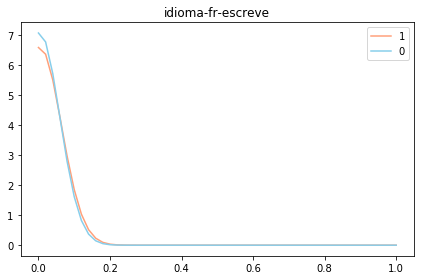

Label = 1 (Mean, Standard-Deviation): (0.00366537300561, 0.060431267125)
Label = 0 (Mean, Standard-Deviation): (0.00318185452095, 0.0563181171805)
p-value: 0.559350604301
Alternative hipothesis rejected



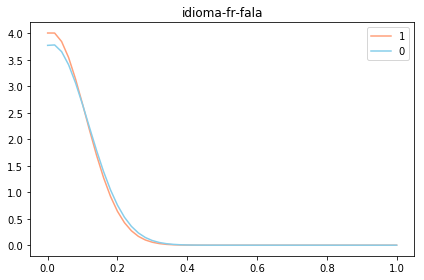

Label = 1 (Mean, Standard-Deviation): (0.00991806813282, 0.0990943997274)
Label = 0 (Mean, Standard-Deviation): (0.0111827453489, 0.105155558842)
p-value: 0.413304432666
Alternative hipothesis rejected



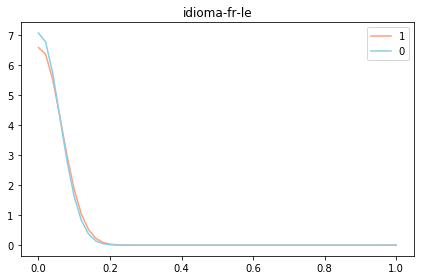

Label = 1 (Mean, Standard-Deviation): (0.00366537300561, 0.060431267125)
Label = 0 (Mean, Standard-Deviation): (0.00318185452095, 0.0563181171805)
p-value: 0.559350604301
Alternative hipothesis rejected



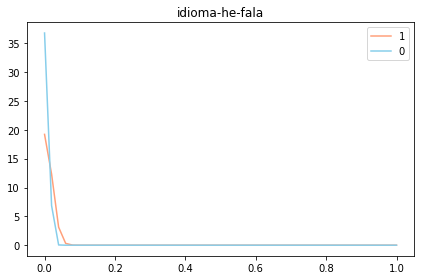

Label = 1 (Mean, Standard-Deviation): (0.000431220353601, 0.0207613680331)
Label = 0 (Mean, Standard-Deviation): (0.000117634966137, 0.0108453274802)
p-value: 0.0500356268564
Alternative hipothesis rejected



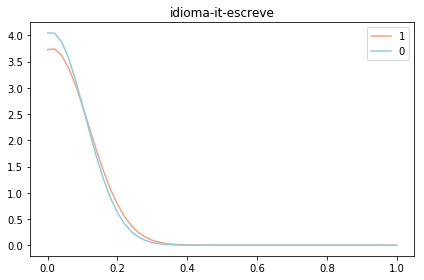

Label = 1 (Mean, Standard-Deviation): (0.0114273393704, 0.106286195178)
Label = 0 (Mean, Standard-Deviation): (0.00972087392501, 0.0981141097658)
p-value: 0.236946906136
Alternative hipothesis rejected



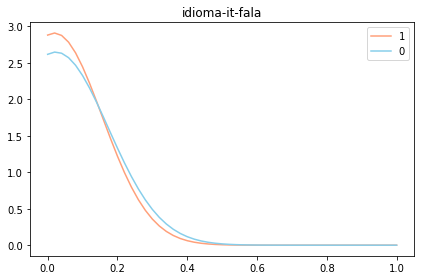

Label = 1 (Mean, Standard-Deviation): (0.0191893057352, 0.137189927767)
Label = 0 (Mean, Standard-Deviation): (0.0232528923355, 0.150705657935)
p-value: 0.0666104835583
Alternative hipothesis rejected



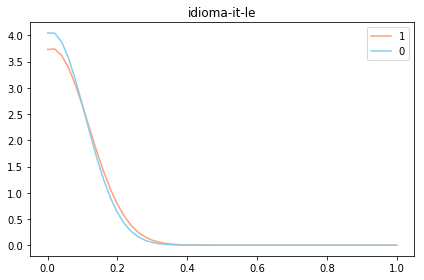

Label = 1 (Mean, Standard-Deviation): (0.0114273393704, 0.106286195178)
Label = 0 (Mean, Standard-Deviation): (0.00972087392501, 0.0981141097658)
p-value: 0.236946906136
Alternative hipothesis rejected



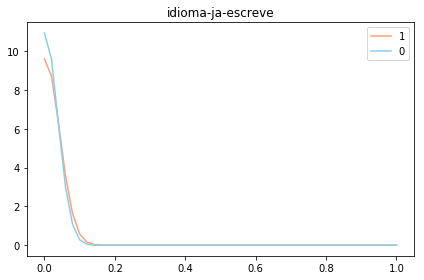

Label = 1 (Mean, Standard-Deviation): (0.0017248814144, 0.0414958576066)
Label = 0 (Mean, Standard-Deviation): (0.00132996036958, 0.0364443627327)
p-value: 0.461294531769
Alternative hipothesis rejected



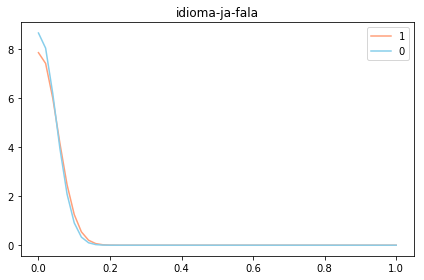

Label = 1 (Mean, Standard-Deviation): (0.0025873221216, 0.050799880766)
Label = 0 (Mean, Standard-Deviation): (0.00212999234802, 0.0461026624027)
p-value: 0.500003954348
Alternative hipothesis rejected



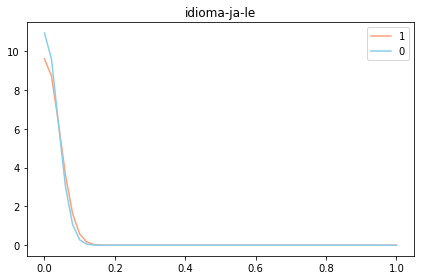

Label = 1 (Mean, Standard-Deviation): (0.0017248814144, 0.0414958576066)
Label = 0 (Mean, Standard-Deviation): (0.00132996036958, 0.0364443627327)
p-value: 0.461294531769
Alternative hipothesis rejected



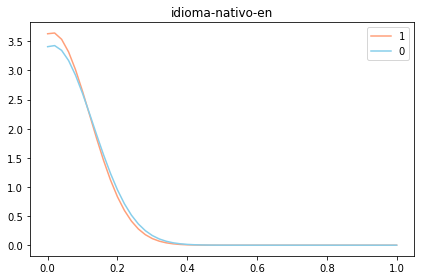

Label = 1 (Mean, Standard-Deviation): (0.0120741699008, 0.109217142986)
Label = 0 (Mean, Standard-Deviation): (0.0136987631197, 0.116237287514)
p-value: 0.341741647595
Alternative hipothesis rejected



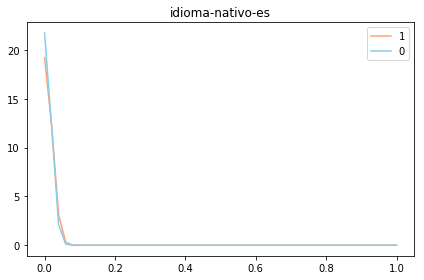

Label = 1 (Mean, Standard-Deviation): (0.000431220353601, 0.0207613680331)
Label = 0 (Mean, Standard-Deviation): (0.000336344636188, 0.0183366166038)
p-value: 0.725007052152
Alternative hipothesis rejected



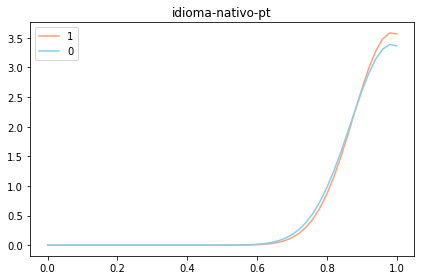

Label = 1 (Mean, Standard-Deviation): (0.987494609746, 0.111126079158)
Label = 0 (Mean, Standard-Deviation): (0.985964892244, 0.117635553751)
p-value: 0.376396481531
Alternative hipothesis rejected



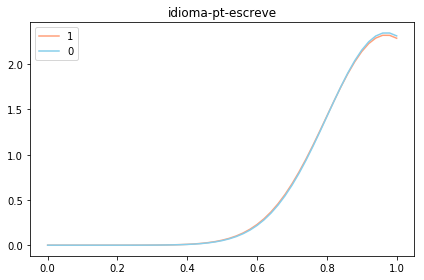

Label = 1 (Mean, Standard-Deviation): (0.969598965071, 0.171688124237)
Label = 0 (Mean, Standard-Deviation): (0.970274900353, 0.1698279073)
p-value: 0.786628550172
Alternative hipothesis rejected



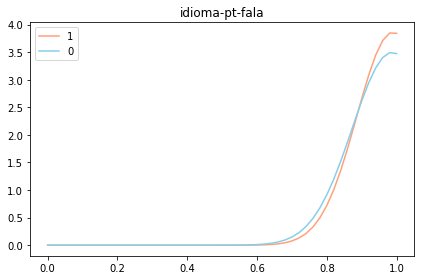

Label = 1 (Mean, Standard-Deviation): (0.98921949116, 0.1032680467)
Label = 0 (Mean, Standard-Deviation): (0.986818602314, 0.114051078211)
p-value: 0.152121568959
Alternative hipothesis rejected



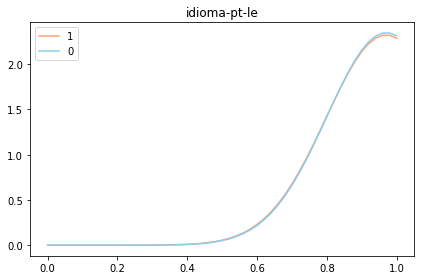

Label = 1 (Mean, Standard-Deviation): (0.969598965071, 0.171688124237)
Label = 0 (Mean, Standard-Deviation): (0.970274900353, 0.1698279073)
p-value: 0.786628550172
Alternative hipothesis rejected



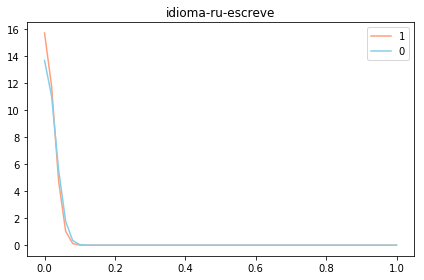

Label = 1 (Mean, Standard-Deviation): (0.000646830530401, 0.0254246364903)
Label = 0 (Mean, Standard-Deviation): (0.000853710069782, 0.0292058427185)
p-value: 0.629860809829
Alternative hipothesis rejected



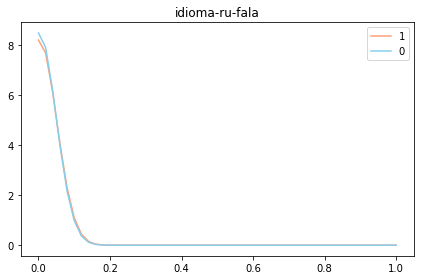

Label = 1 (Mean, Standard-Deviation): (0.0023717119448, 0.0486424395693)
Label = 0 (Mean, Standard-Deviation): (0.00221679096381, 0.0470305943151)
p-value: 0.822744270595
Alternative hipothesis rejected



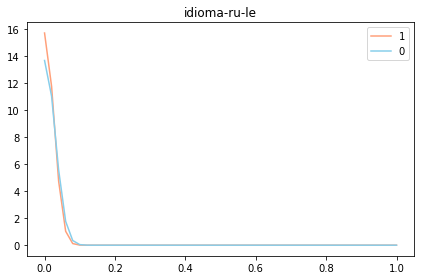

Label = 1 (Mean, Standard-Deviation): (0.000646830530401, 0.0254246364903)
Label = 0 (Mean, Standard-Deviation): (0.000853710069782, 0.0292058427185)
p-value: 0.629860809829
Alternative hipothesis rejected



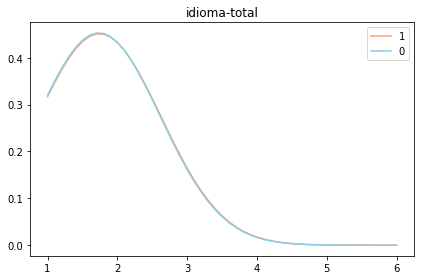

Label = 1 (Mean, Standard-Deviation): (1.74363949978, 0.884218807158)
Label = 0 (Mean, Standard-Deviation): (1.73434769698, 0.880517170758)
p-value: 0.472937133642
Alternative hipothesis rejected



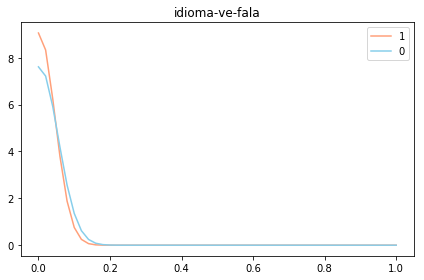

Label = 1 (Mean, Standard-Deviation): (0.0019404915912, 0.0440082501764)
Label = 0 (Mean, Standard-Deviation): (0.00274671935495, 0.05233712724)
p-value: 0.294588211271
Alternative hipothesis rejected



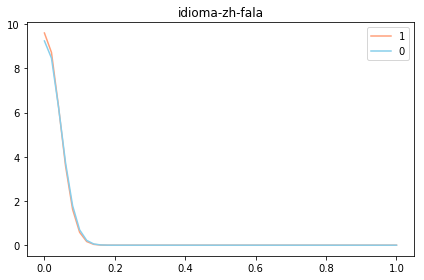

Label = 1 (Mean, Standard-Deviation): (0.0017248814144, 0.0414958576066)
Label = 0 (Mean, Standard-Deviation): (0.0018616018913, 0.0431061054805)
p-value: 0.82919163336
Alternative hipothesis rejected



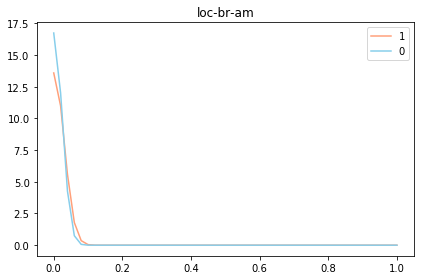

Label = 1 (Mean, Standard-Deviation): (0.000862440707201, 0.0293546742995)
Label = 0 (Mean, Standard-Deviation): (0.000568188307313, 0.0238299280184)
p-value: 0.401329029457
Alternative hipothesis rejected



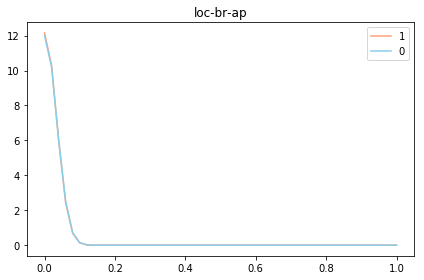

Label = 1 (Mean, Standard-Deviation): (0.001078050884, 0.0328159822387)
Label = 0 (Mean, Standard-Deviation): (0.0011061113078, 0.0332398529717)
p-value: 0.954213034007
Alternative hipothesis rejected



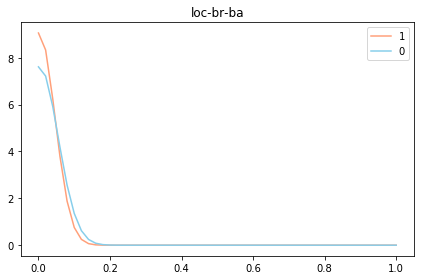

Label = 1 (Mean, Standard-Deviation): (0.0019404915912, 0.0440082501764)
Label = 0 (Mean, Standard-Deviation): (0.00274671935495, 0.05233712724)
p-value: 0.294588211271
Alternative hipothesis rejected



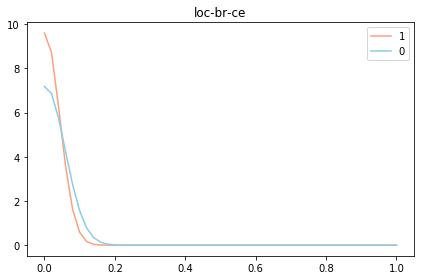

Label = 1 (Mean, Standard-Deviation): (0.0017248814144, 0.0414958576066)
Label = 0 (Mean, Standard-Deviation): (0.00308477712171, 0.0554550382907)
p-value: 0.0951544232635
Alternative hipothesis rejected



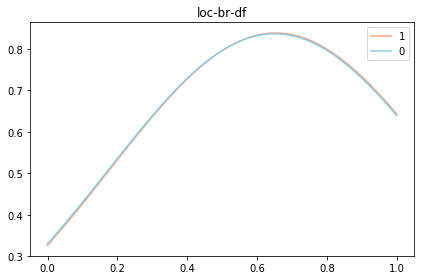

Label = 1 (Mean, Standard-Deviation): (0.653514445882, 0.475850097095)
Label = 0 (Mean, Standard-Deviation): (0.650303224112, 0.476874135199)
p-value: 0.646956827813
Alternative hipothesis rejected



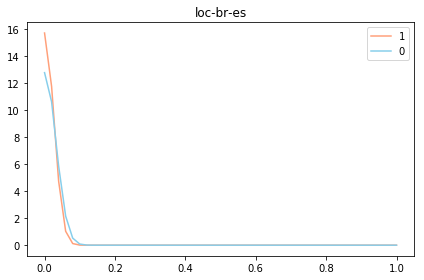

Label = 1 (Mean, Standard-Deviation): (0.000646830530401, 0.0254246364903)
Label = 0 (Mean, Standard-Deviation): (0.000978197558218, 0.0312608491208)
p-value: 0.470747908252
Alternative hipothesis rejected



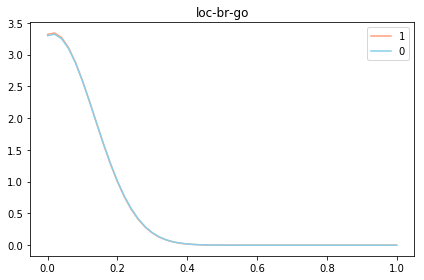

Label = 1 (Mean, Standard-Deviation): (0.0144458818456, 0.119319731576)
Label = 0 (Mean, Standard-Deviation): (0.014621569456, 0.120032408801)
p-value: 0.920701800184
Alternative hipothesis rejected



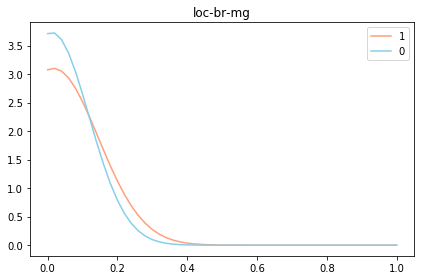

Label = 1 (Mean, Standard-Deviation): (0.0168175937904, 0.128587566777)
Label = 0 (Mean, Standard-Deviation): (0.0115544946836, 0.106869024213)
p-value: 0.000815384154142
Null hipothesis rejected



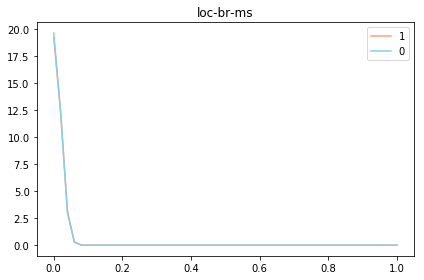

Label = 1 (Mean, Standard-Deviation): (0.000431220353601, 0.0207613680331)
Label = 0 (Mean, Standard-Deviation): (0.00041400655558, 0.0203429386803)
p-value: 0.954108708033
Alternative hipothesis rejected



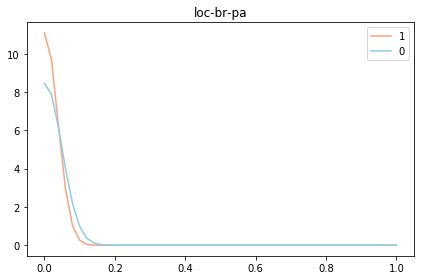

Label = 1 (Mean, Standard-Deviation): (0.0012936610608, 0.035944227657)
Label = 0 (Mean, Standard-Deviation): (0.00222421452963, 0.0471091010247)
p-value: 0.17888069969
Alternative hipothesis rejected



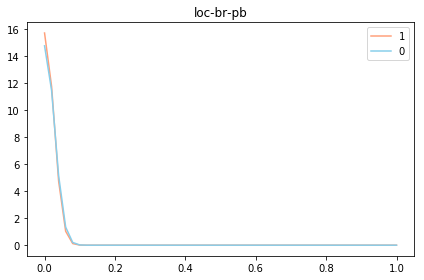

Label = 1 (Mean, Standard-Deviation): (0.000646830530401, 0.0254246364903)
Label = 0 (Mean, Standard-Deviation): (0.000732648842495, 0.027057569517)
p-value: 0.829183305514
Alternative hipothesis rejected



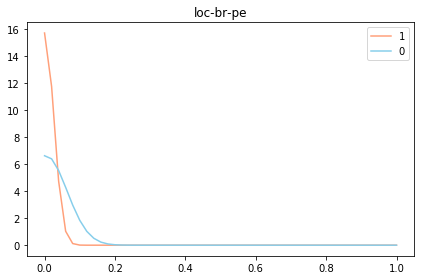

Label = 1 (Mean, Standard-Deviation): (0.000646830530401, 0.0254246364903)
Label = 0 (Mean, Standard-Deviation): (0.00363926038443, 0.0602164111209)
p-value: 0.000715584958993
Null hipothesis rejected



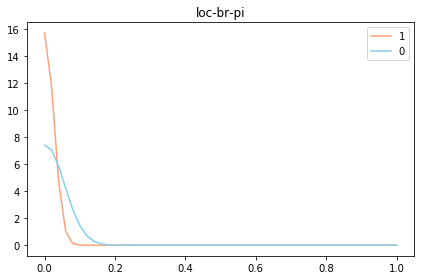

Label = 1 (Mean, Standard-Deviation): (0.000646830530401, 0.0254246364903)
Label = 0 (Mean, Standard-Deviation): (0.00291232197718, 0.0538872931022)
p-value: 0.00420600663661
Null hipothesis rejected



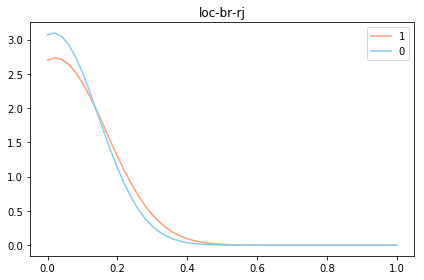

Label = 1 (Mean, Standard-Deviation): (0.0217766278568, 0.145953438932)
Label = 0 (Mean, Standard-Deviation): (0.0168720519878, 0.128792025567)
p-value: 0.00962421940749
Null hipothesis rejected



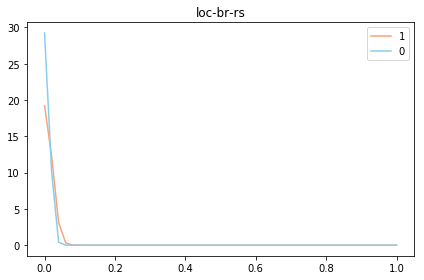

Label = 1 (Mean, Standard-Deviation): (0.000431220353601, 0.0207613680331)
Label = 0 (Mean, Standard-Deviation): (0.00018616018913, 0.0136427832026)
p-value: 0.222627728944
Alternative hipothesis rejected



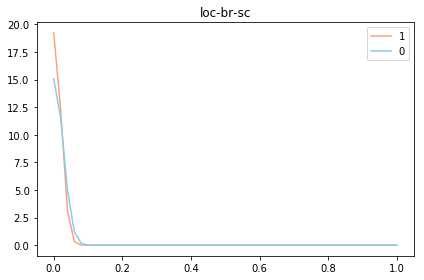

Label = 1 (Mean, Standard-Deviation): (0.000431220353601, 0.0207613680331)
Label = 0 (Mean, Standard-Deviation): (0.000701241448623, 0.0264716774885)
p-value: 0.487613733694
Alternative hipothesis rejected



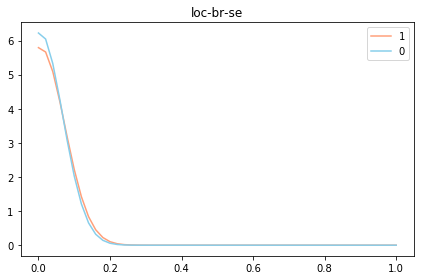

Label = 1 (Mean, Standard-Deviation): (0.00474342388961, 0.068708979176)
Label = 0 (Mean, Standard-Deviation): (0.00411151337955, 0.0639891306183)
p-value: 0.501895843312
Alternative hipothesis rejected



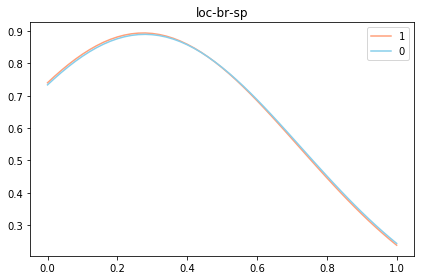

Label = 1 (Mean, Standard-Deviation): (0.27425614489, 0.446138668891)
Label = 0 (Mean, Standard-Deviation): (0.27847337224, 0.44824764717)
p-value: 0.522244363839
Alternative hipothesis rejected



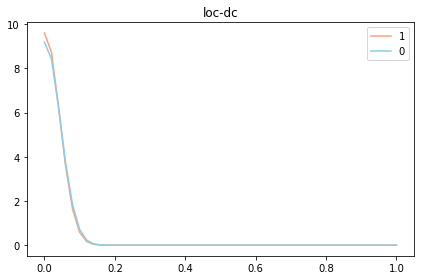

Label = 1 (Mean, Standard-Deviation): (0.0017248814144, 0.0414958576066)
Label = 0 (Mean, Standard-Deviation): (0.00188501467582, 0.0433758157905)
p-value: 0.801724934855
Alternative hipothesis rejected



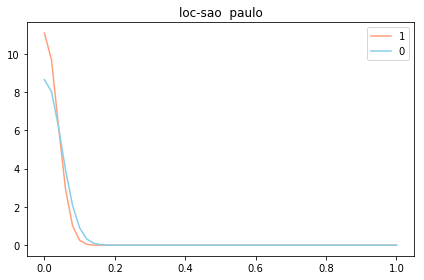

Label = 1 (Mean, Standard-Deviation): (0.0012936610608, 0.035944227657)
Label = 0 (Mean, Standard-Deviation): (0.00212713713039, 0.0460718180455)
p-value: 0.218307043743
Alternative hipothesis rejected



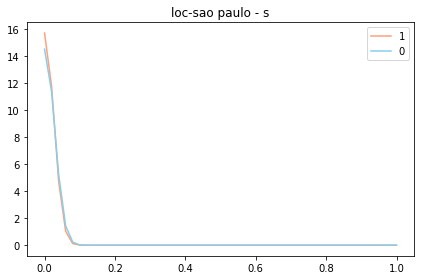

Label = 1 (Mean, Standard-Deviation): (0.000646830530401, 0.0254246364903)
Label = 0 (Mean, Standard-Deviation): (0.000757774757592, 0.0275172770275)
p-value: 0.7838792767
Alternative hipothesis rejected



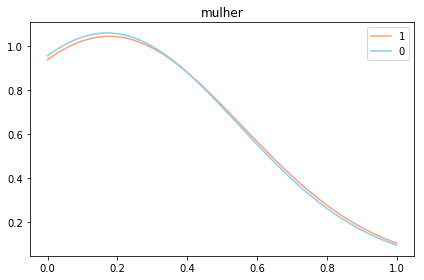

Label = 1 (Mean, Standard-Deviation): (0.177015955153, 0.38168220652)
Label = 0 (Mean, Standard-Deviation): (0.170599253075, 0.376158408022)
p-value: 0.245987072308
Alternative hipothesis rejected



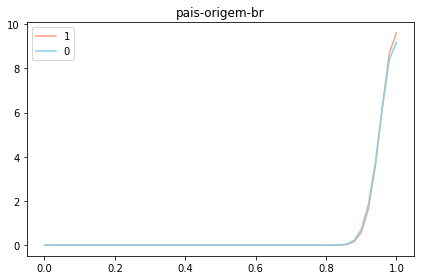

Label = 1 (Mean, Standard-Deviation): (0.998275118586, 0.0414958576066)
Label = 0 (Mean, Standard-Deviation): (0.998114985324, 0.0433758157905)
p-value: 0.801724934855
Alternative hipothesis rejected



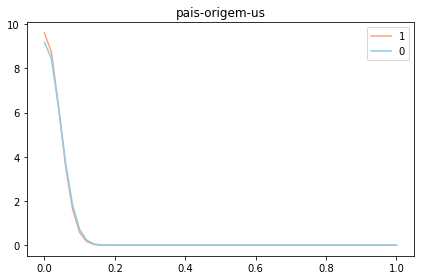

Label = 1 (Mean, Standard-Deviation): (0.0017248814144, 0.0414958576066)
Label = 0 (Mean, Standard-Deviation): (0.00188501467582, 0.0433758157905)
p-value: 0.801724934855
Alternative hipothesis rejected



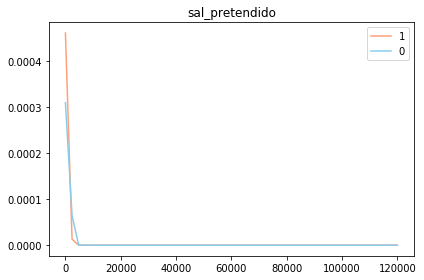

Label = 1 (Mean, Standard-Deviation): (97.4294954722, 861.257222888)
Label = 0 (Mean, Standard-Deviation): (109.934440777, 1285.95886344)
p-value: 0.508065045292
Alternative hipothesis rejected



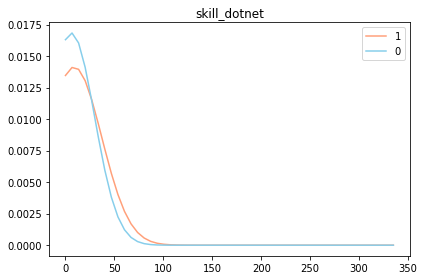

Label = 1 (Mean, Standard-Deviation): (8.82104355326, 28.2298574661)
Label = 0 (Mean, Standard-Deviation): (6.02292853961, 23.6998430851)
p-value: 1.0119519123e-15
Null hipothesis rejected



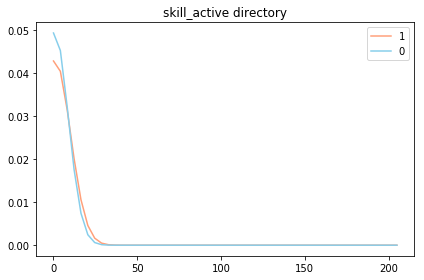

Label = 1 (Mean, Standard-Deviation): (0.838076757223, 9.28984890738)
Label = 0 (Mean, Standard-Deviation): (0.681445082744, 8.0687768592)
p-value: 0.186934584876
Alternative hipothesis rejected



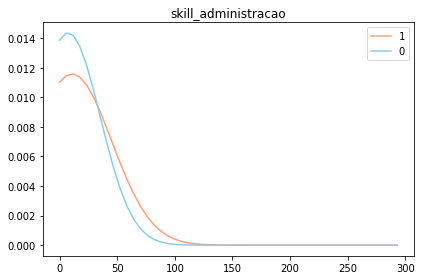

Label = 1 (Mean, Standard-Deviation): (10.8978007762, 34.4277795486)
Label = 0 (Mean, Standard-Deviation): (7.43633721262, 27.7493682109)
p-value: 2.29466401647e-17
Null hipothesis rejected



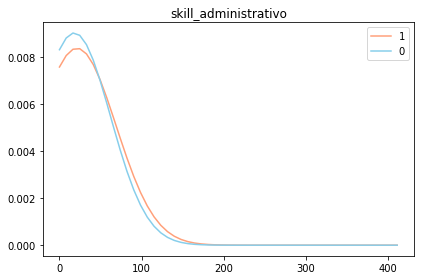

Label = 1 (Mean, Standard-Deviation): (21.3309616214, 47.6194192859)
Label = 0 (Mean, Standard-Deviation): (17.9605831496, 44.1820597788)
p-value: 2.13533340779e-07
Null hipothesis rejected



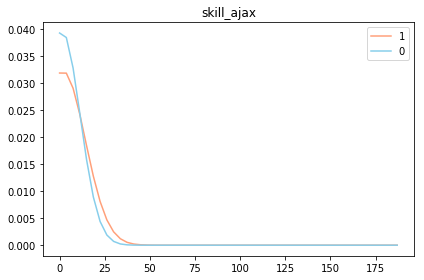

Label = 1 (Mean, Standard-Deviation): (1.84152652005, 12.3934573044)
Label = 0 (Mean, Standard-Deviation): (1.2872434587, 10.085219439)
p-value: 0.000187374928524
Null hipothesis rejected



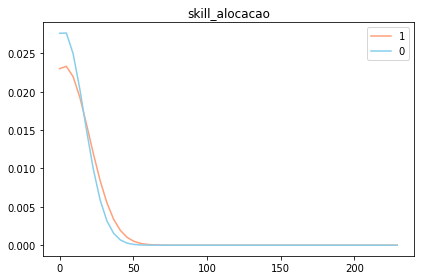

Label = 1 (Mean, Standard-Deviation): (3.1162138853, 17.0548436852)
Label = 0 (Mean, Standard-Deviation): (2.34741945431, 14.2528609282)
p-value: 0.000245902534747
Null hipothesis rejected



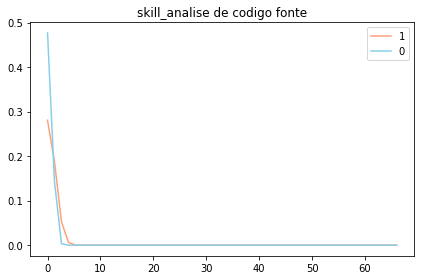

Label = 1 (Mean, Standard-Deviation): (0.0383786114705, 1.42144972483)
Label = 0 (Mean, Standard-Deviation): (0.0162884455053, 0.83679426497)
p-value: 0.0732957028654
Alternative hipothesis rejected



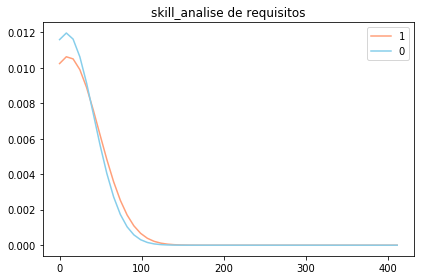

Label = 1 (Mean, Standard-Deviation): (10.3861578266, 37.5123707965)
Label = 0 (Mean, Standard-Deviation): (8.38569421761, 33.3670509635)
p-value: 4.57855776993e-05
Null hipothesis rejected



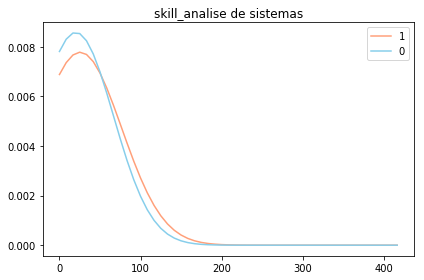

Label = 1 (Mean, Standard-Deviation): (25.4047003019, 51.2506741771)
Label = 0 (Mean, Standard-Deviation): (20.1395618954, 46.4883551877)
p-value: 1.35342671372e-14
Null hipothesis rejected



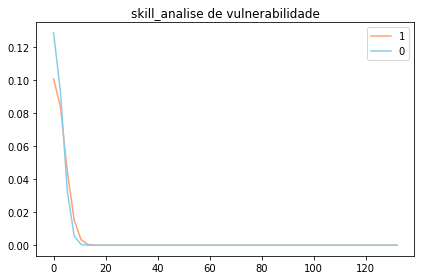

Label = 1 (Mean, Standard-Deviation): (0.223372143165, 3.94874957582)
Label = 0 (Mean, Standard-Deviation): (0.137571808723, 3.09678117678)
p-value: 0.0597239295164
Alternative hipothesis rejected



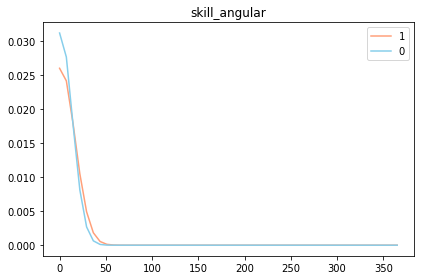

Label = 1 (Mean, Standard-Deviation): (1.29969814575, 15.2627372039)
Label = 0 (Mean, Standard-Deviation): (0.985844973104, 12.7341566282)
p-value: 0.0938723468941
Alternative hipothesis rejected



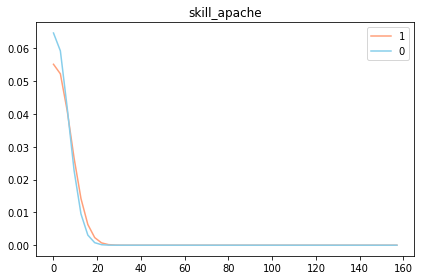

Label = 1 (Mean, Standard-Deviation): (0.673997412678, 7.20761964584)
Label = 0 (Mean, Standard-Deviation): (0.510081202389, 6.15093214521)
p-value: 0.0700510822976
Alternative hipothesis rejected



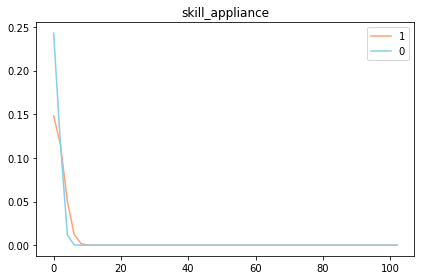

Label = 1 (Mean, Standard-Deviation): (0.122466580423, 2.68925476653)
Label = 0 (Mean, Standard-Deviation): (0.0420744869174, 1.64094547022)
p-value: 0.00088533351216
Null hipothesis rejected



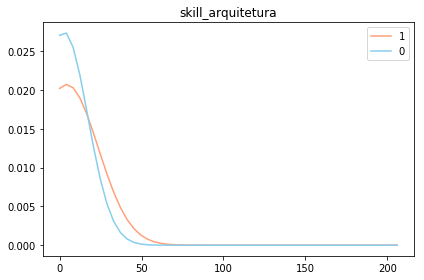

Label = 1 (Mean, Standard-Deviation): (4.32492453644, 19.250002597)
Label = 0 (Mean, Standard-Deviation): (2.63228451673, 14.5093398107)
p-value: 2.25849706562e-15
Null hipothesis rejected



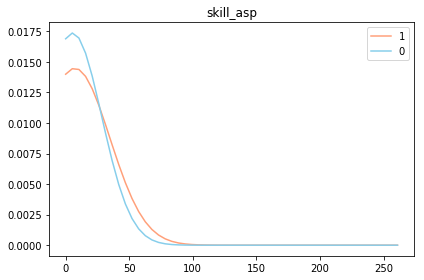

Label = 1 (Mean, Standard-Deviation): (7.20827943079, 27.5513038319)
Label = 0 (Mean, Standard-Deviation): (5.39168275106, 22.974241532)
p-value: 7.67057815168e-08
Null hipothesis rejected



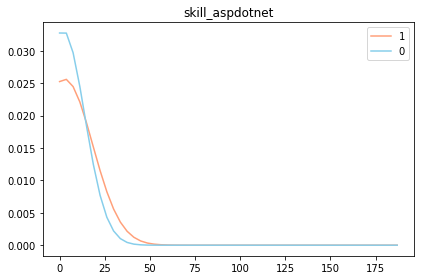

Label = 1 (Mean, Standard-Deviation): (2.73673997413, 15.5636347596)
Label = 0 (Mean, Standard-Deviation): (1.85138478055, 12.0455735438)
p-value: 5.89758654401e-07
Null hipothesis rejected



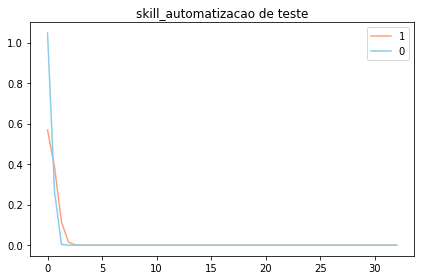

Label = 1 (Mean, Standard-Deviation): (0.0232858990944, 0.701056481577)
Label = 0 (Mean, Standard-Deviation): (0.00791980264736, 0.380931139025)
p-value: 0.00623980233249
Null hipothesis rejected



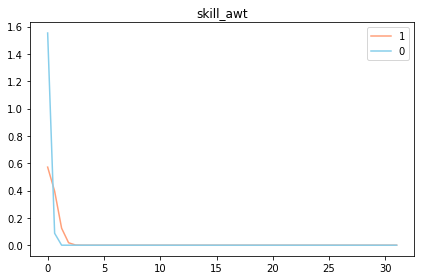

Label = 1 (Mean, Standard-Deviation): (0.0200517464424, 0.698229015126)
Label = 0 (Mean, Standard-Deviation): (0.00321383295835, 0.256964695896)
p-value: 9.89281827919e-06
Null hipothesis rejected



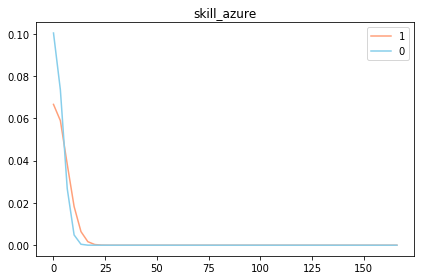

Label = 1 (Mean, Standard-Deviation): (0.340664079345, 5.98045095358)
Label = 0 (Mean, Standard-Deviation): (0.180610788154, 3.97083714473)
p-value: 0.00620359186878
Null hipothesis rejected



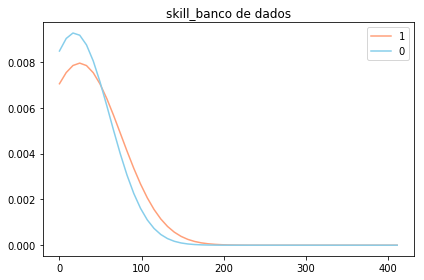

Label = 1 (Mean, Standard-Deviation): (24.598749461, 50.1356638892)
Label = 0 (Mean, Standard-Deviation): (18.1884597814, 42.9885296598)
p-value: 3.79135863244e-24
Null hipothesis rejected



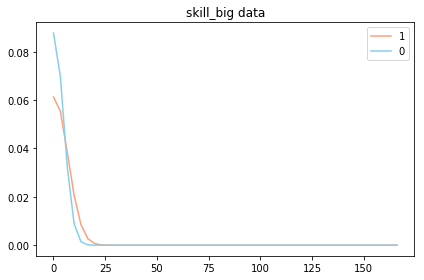

Label = 1 (Mean, Standard-Deviation): (0.371496334627, 6.49541105494)
Label = 0 (Mean, Standard-Deviation): (0.238285613129, 4.53962913693)
p-value: 0.0462603931149
Null hipothesis rejected



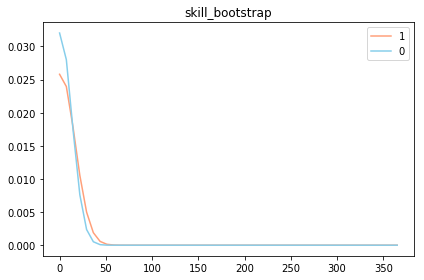

Label = 1 (Mean, Standard-Deviation): (1.23415265201, 15.4111099286)
Label = 0 (Mean, Standard-Deviation): (0.815916696171, 12.426547224)
p-value: 0.0221691804656
Null hipothesis rejected



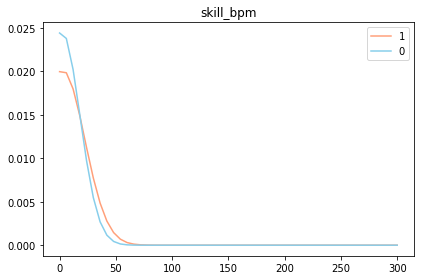

Label = 1 (Mean, Standard-Deviation): (2.5808538163, 19.8050284134)
Label = 0 (Mean, Standard-Deviation): (1.85880092281, 16.22953565)
p-value: 0.0024950879693
Null hipothesis rejected



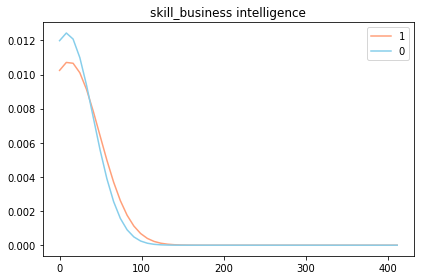

Label = 1 (Mean, Standard-Deviation): (11.5655454937, 37.0916826582)
Label = 0 (Mean, Standard-Deviation): (8.70775191585, 32.0751889128)
p-value: 1.38693960918e-09
Null hipothesis rejected



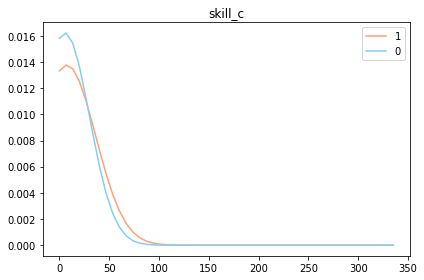

Label = 1 (Mean, Standard-Deviation): (7.45730918499, 28.9735610071)
Label = 0 (Mean, Standard-Deviation): (5.65845372834, 24.5773343152)
p-value: 6.51160157016e-07
Null hipothesis rejected



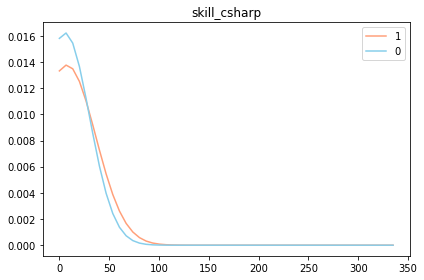

Label = 1 (Mean, Standard-Deviation): (7.45795601552, 28.9734131202)
Label = 0 (Mean, Standard-Deviation): (5.65845372834, 24.5773343152)
p-value: 6.45172261247e-07
Null hipothesis rejected



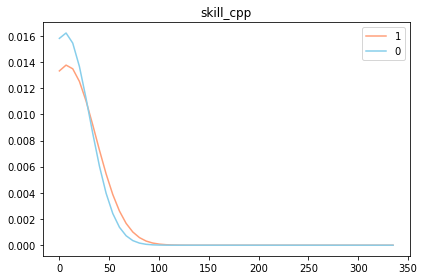

Label = 1 (Mean, Standard-Deviation): (7.45730918499, 28.9735610071)
Label = 0 (Mean, Standard-Deviation): (5.65845372834, 24.5773343152)
p-value: 6.51160157016e-07
Null hipothesis rejected



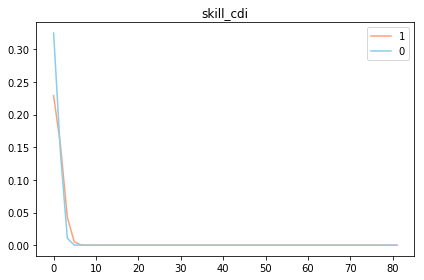

Label = 1 (Mean, Standard-Deviation): (0.0560586459681, 1.73922015605)
Label = 0 (Mean, Standard-Deviation): (0.0325688964013, 1.22670541214)
p-value: 0.193388931459
Alternative hipothesis rejected



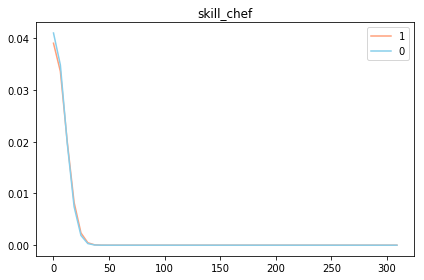

Label = 1 (Mean, Standard-Deviation): (0.559077188443, 10.2040766787)
Label = 0 (Mean, Standard-Deviation): (0.599573430487, 9.70810561041)
p-value: 0.776664573937
Alternative hipothesis rejected



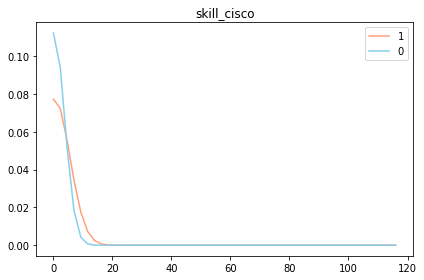

Label = 1 (Mean, Standard-Deviation): (0.399094437257, 5.14813497331)
Label = 0 (Mean, Standard-Deviation): (0.198365102388, 3.54964982602)
p-value: 0.000122804510159
Null hipothesis rejected



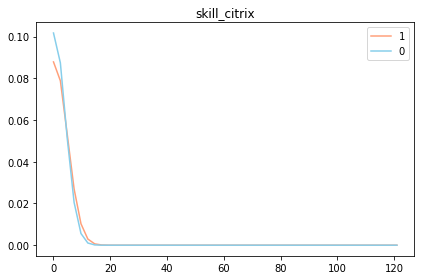

Label = 1 (Mean, Standard-Deviation): (0.289133247089, 4.53103124452)
Label = 0 (Mean, Standard-Deviation): (0.251381354287, 3.91348017006)
p-value: 0.511953166024
Alternative hipothesis rejected



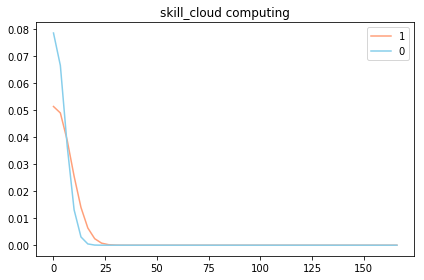

Label = 1 (Mean, Standard-Deviation): (0.803363518758, 7.7189007613)
Label = 0 (Mean, Standard-Deviation): (0.377960575155, 5.05850385583)
p-value: 1.13235389861e-08
Null hipothesis rejected



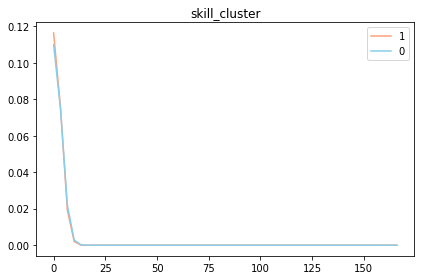

Label = 1 (Mean, Standard-Deviation): (0.137559292799, 3.42788193376)
Label = 0 (Mean, Standard-Deviation): (0.132533491703, 3.62945523079)
p-value: 0.924956209722
Alternative hipothesis rejected



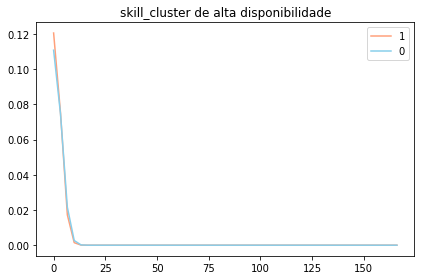

Label = 1 (Mean, Standard-Deviation): (0.110176800345, 3.30857666209)
Label = 0 (Mean, Standard-Deviation): (0.123002204228, 3.60016239859)
p-value: 0.80851510932
Alternative hipothesis rejected



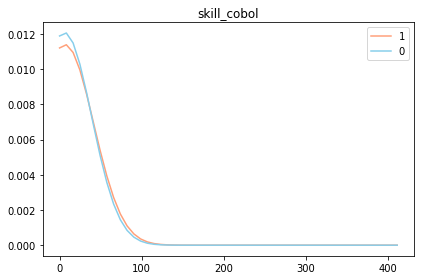

Label = 1 (Mean, Standard-Deviation): (6.50237171194, 34.9699663967)
Label = 0 (Mean, Standard-Deviation): (5.96697940817, 32.9982187597)
p-value: 0.269888020677
Alternative hipothesis rejected



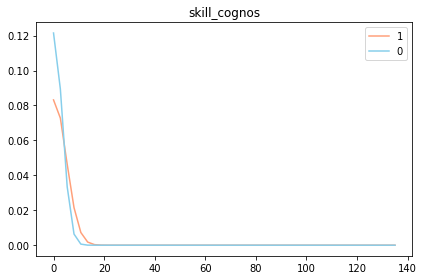

Label = 1 (Mean, Standard-Deviation): (0.21431651574, 4.79234533619)
Label = 0 (Mean, Standard-Deviation): (0.128847405749, 3.28184228217)
p-value: 0.0769580511262
Alternative hipothesis rejected



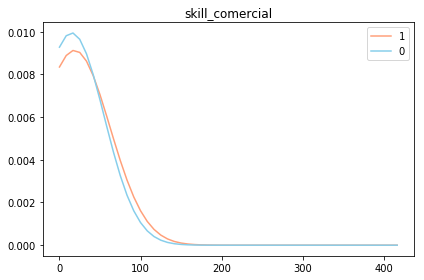

Label = 1 (Mean, Standard-Deviation): (18.496334627, 43.6958830275)
Label = 0 (Mean, Standard-Deviation): (14.9938304458, 40.1014017203)
p-value: 2.8707931024e-09
Null hipothesis rejected



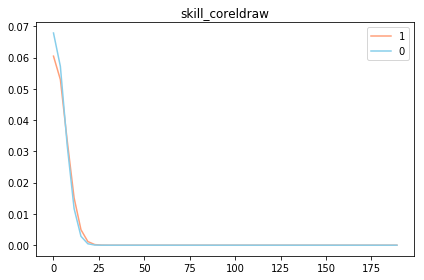

Label = 1 (Mean, Standard-Deviation): (0.370418283743, 6.5885617917)
Label = 0 (Mean, Standard-Deviation): (0.329946093491, 5.86980726502)
p-value: 0.639222680203
Alternative hipothesis rejected



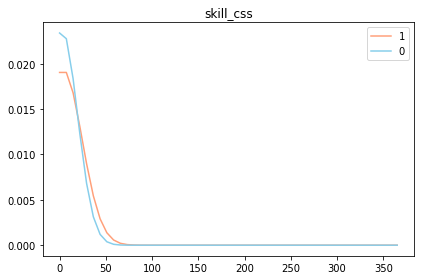

Label = 1 (Mean, Standard-Deviation): (3.64704614058, 20.6274852255)
Label = 0 (Mean, Standard-Deviation): (2.58985712491, 16.8588575205)
p-value: 2.02465556208e-05
Null hipothesis rejected



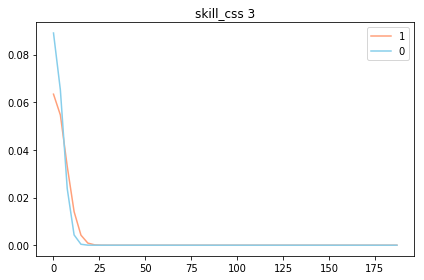

Label = 1 (Mean, Standard-Deviation): (0.305088400172, 6.28789160492)
Label = 0 (Mean, Standard-Deviation): (0.197563357279, 4.47603695968)
p-value: 0.102735929529
Alternative hipothesis rejected



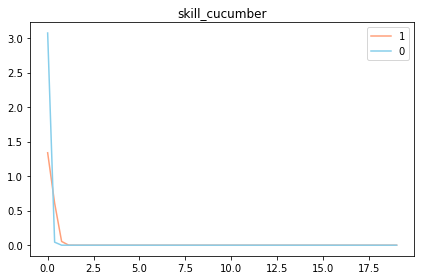

Label = 1 (Mean, Standard-Deviation): (0.00603708495041, 0.297984809088)
Label = 0 (Mean, Standard-Deviation): (0.00133395767425, 0.129841640756)
p-value: 0.0142938662436
Null hipothesis rejected



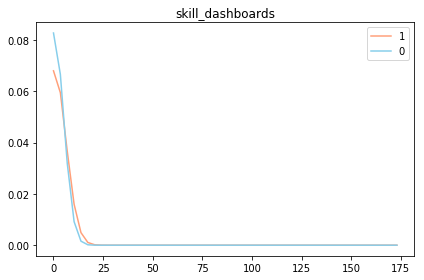

Label = 1 (Mean, Standard-Deviation): (0.40297542044, 5.85504501815)
Label = 0 (Mean, Standard-Deviation): (0.275770052193, 4.81488912043)
p-value: 0.0725412852576
Alternative hipothesis rejected



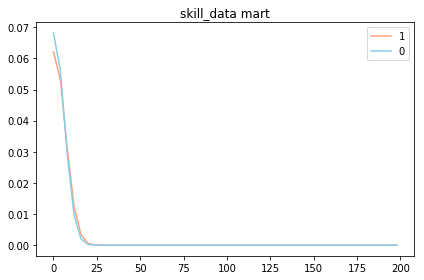

Label = 1 (Mean, Standard-Deviation): (0.35510996119, 6.41184177444)
Label = 0 (Mean, Standard-Deviation): (0.307697666716, 5.84421547013)
p-value: 0.581209916523
Alternative hipothesis rejected



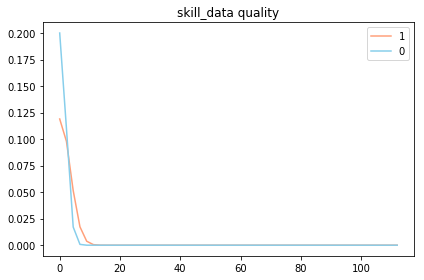

Label = 1 (Mean, Standard-Deviation): (0.141009055627, 3.35083096404)
Label = 0 (Mean, Standard-Deviation): (0.0585559451341, 1.9941667861)
p-value: 0.00502566140799
Null hipothesis rejected



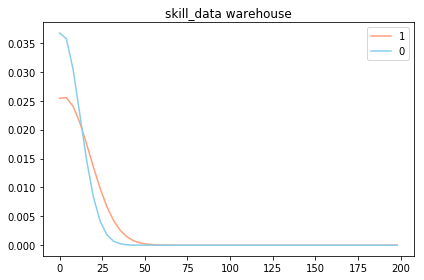

Label = 1 (Mean, Standard-Deviation): (2.25140146615, 15.524666805)
Label = 0 (Mean, Standard-Deviation): (1.19658344659, 10.7989712097)
p-value: 3.26822258816e-11
Null hipothesis rejected



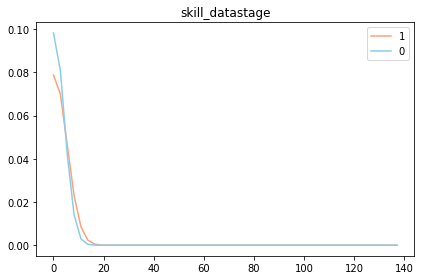

Label = 1 (Mean, Standard-Deviation): (0.271021992238, 5.05703403393)
Label = 0 (Mean, Standard-Deviation): (0.203376580363, 4.05520110054)
p-value: 0.256920141532
Alternative hipothesis rejected



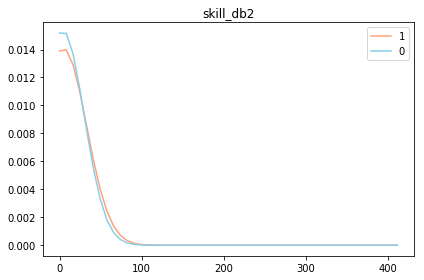

Label = 1 (Mean, Standard-Deviation): (4.56209573092, 28.3212475166)
Label = 0 (Mean, Standard-Deviation): (3.91971299352, 25.981473721)
p-value: 0.0927291118996
Alternative hipothesis rejected



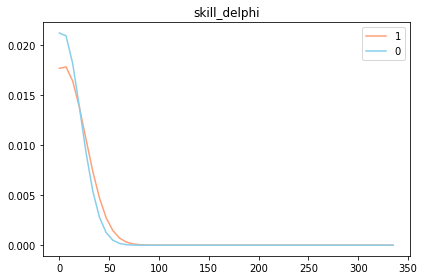

Label = 1 (Mean, Standard-Deviation): (3.92884864166, 22.2030037713)
Label = 0 (Mean, Standard-Deviation): (2.65357073516, 18.6107666177)
p-value: 3.19499313284e-06
Null hipothesis rejected



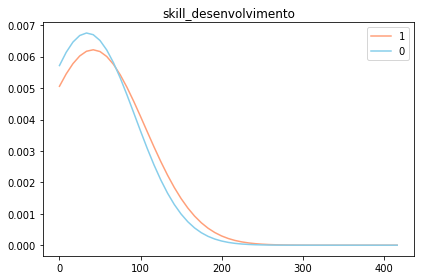

Label = 1 (Mean, Standard-Deviation): (41.2470892626, 64.1355911194)
Label = 0 (Mean, Standard-Deviation): (34.0891547414, 59.0650233643)
p-value: 1.71830012427e-16
Null hipothesis rejected



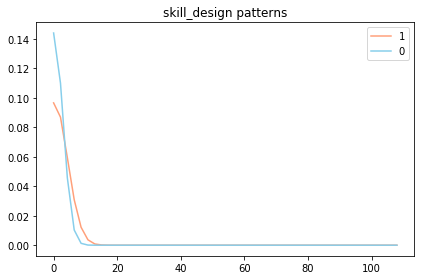

Label = 1 (Mean, Standard-Deviation): (0.249892194912, 4.12021214412)
Label = 0 (Mean, Standard-Deviation): (0.126434175813, 2.76555903125)
p-value: 0.00243507882866
Null hipothesis rejected



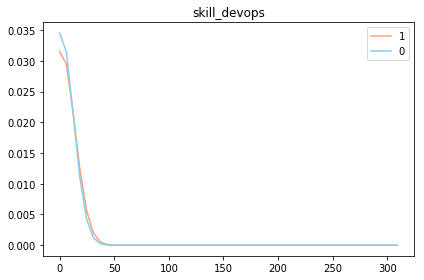

Label = 1 (Mean, Standard-Deviation): (1.33527382492, 12.5781014074)
Label = 0 (Mean, Standard-Deviation): (1.13382290798, 11.4931010623)
p-value: 0.233333346816
Alternative hipothesis rejected



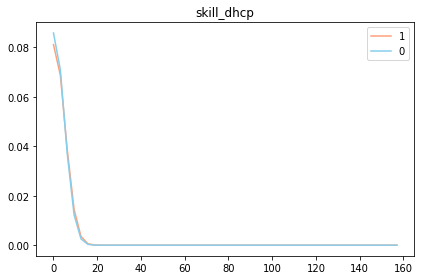

Label = 1 (Mean, Standard-Deviation): (0.294954721863, 4.90848773247)
Label = 0 (Mean, Standard-Deviation): (0.256702908896, 4.64063214417)
p-value: 0.57511922197
Alternative hipothesis rejected



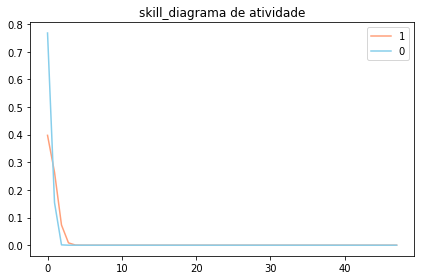

Label = 1 (Mean, Standard-Deviation): (0.0323415265201, 1.0033523768)
Label = 0 (Mean, Standard-Deviation): (0.00846172295252, 0.5196438226)
p-value: 0.00184402563699
Null hipothesis rejected



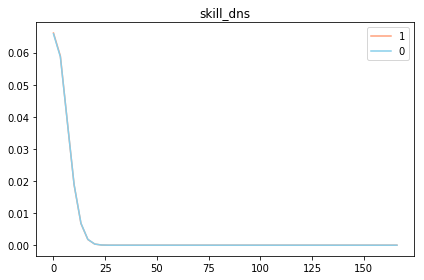

Label = 1 (Mean, Standard-Deviation): (0.406425183269, 6.02042822042)
Label = 0 (Mean, Standard-Deviation): (0.396345892484, 6.04472579265)
p-value: 0.909706064845
Alternative hipothesis rejected



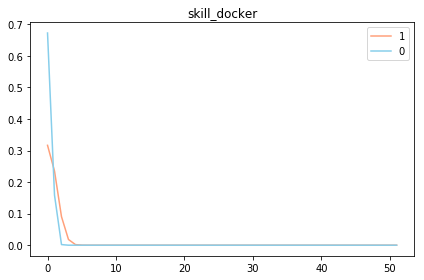

Label = 1 (Mean, Standard-Deviation): (0.0461405778353, 1.25921578335)
Label = 0 (Mean, Standard-Deviation): (0.0116207357325, 0.592952245264)
p-value: 8.10553399522e-05
Null hipothesis rejected



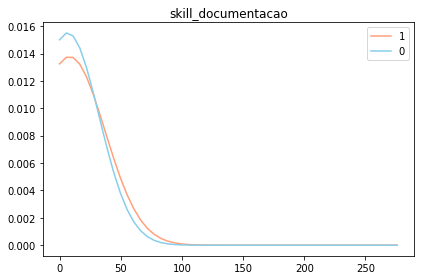

Label = 1 (Mean, Standard-Deviation): (8.1765847348, 28.9378539521)
Label = 0 (Mean, Standard-Deviation): (6.63008143081, 25.7092218402)
p-value: 4.31807282311e-05
Null hipothesis rejected



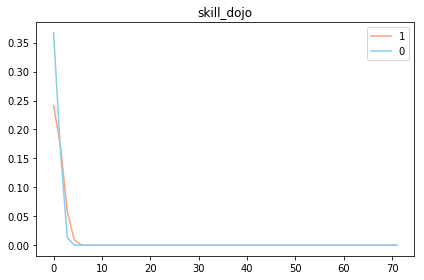

Label = 1 (Mean, Standard-Deviation): (0.0478654592497, 1.65002736711)
Label = 0 (Mean, Standard-Deviation): (0.0283249009239, 1.08748084858)
p-value: 0.222464347559
Alternative hipothesis rejected



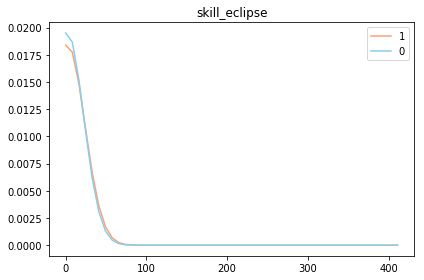

Label = 1 (Mean, Standard-Deviation): (2.10974557999, 21.5946882468)
Label = 0 (Mean, Standard-Deviation): (1.89767870807, 20.3577905901)
p-value: 0.478714607299
Alternative hipothesis rejected



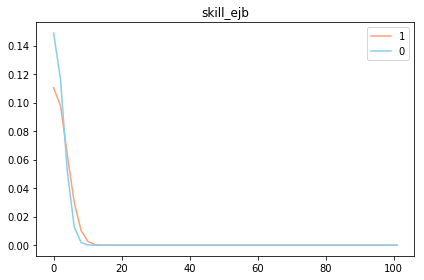

Label = 1 (Mean, Standard-Deviation): (0.23178094006, 3.60506792821)
Label = 0 (Mean, Standard-Deviation): (0.136468552633, 2.67719214601)
p-value: 0.0155731837891
Null hipothesis rejected



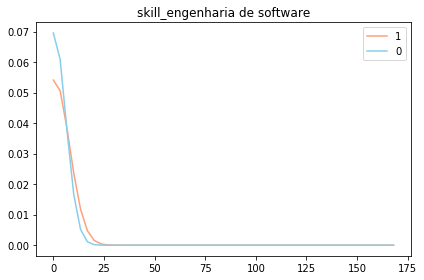

Label = 1 (Mean, Standard-Deviation): (0.603061664511, 7.34448126344)
Label = 0 (Mean, Standard-Deviation): (0.387426192624, 5.72164574755)
p-value: 0.0104355841496
Null hipothesis rejected



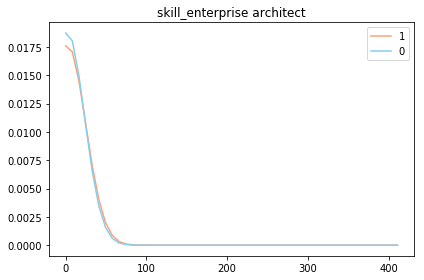

Label = 1 (Mean, Standard-Deviation): (2.22984044847, 22.5758889331)
Label = 0 (Mean, Standard-Deviation): (2.06202788977, 21.2096535448)
p-value: 0.590557346781
Alternative hipothesis rejected



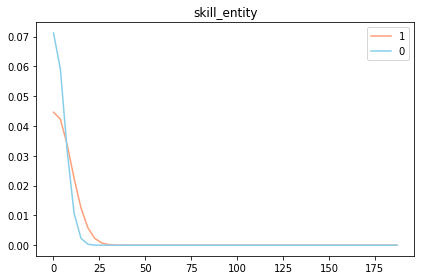

Label = 1 (Mean, Standard-Deviation): (0.743855109961, 8.90764869272)
Label = 0 (Mean, Standard-Deviation): (0.324450370607, 5.59204128414)
p-value: 3.56864974976e-07
Null hipothesis rejected



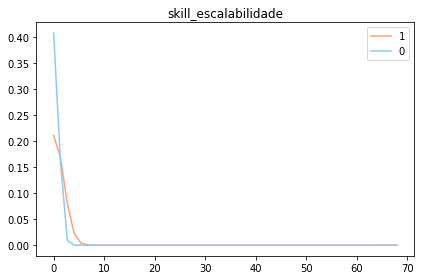

Label = 1 (Mean, Standard-Deviation): (0.0860284605433, 1.88596154167)
Label = 0 (Mean, Standard-Deviation): (0.0261652143126, 0.976729057413)
p-value: 3.27397780041e-05
Null hipothesis rejected



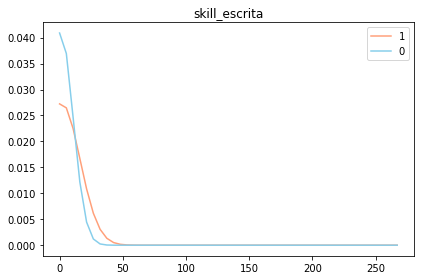

Label = 1 (Mean, Standard-Deviation): (1.54053471324, 14.5656820755)
Label = 0 (Mean, Standard-Deviation): (0.874611404881, 9.71455561122)
p-value: 3.24719113441e-06
Null hipothesis rejected



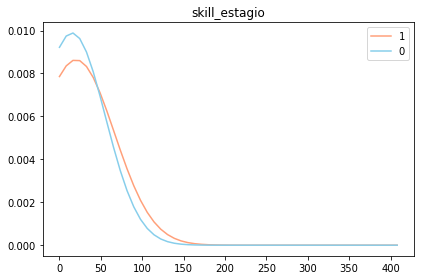

Label = 1 (Mean, Standard-Deviation): (20.103708495, 46.1931680969)
Label = 0 (Mean, Standard-Deviation): (15.1197769504, 40.3471479516)
p-value: 4.54781930339e-17
Null hipothesis rejected



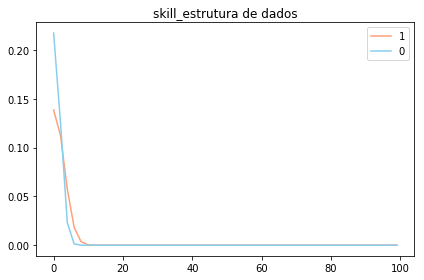

Label = 1 (Mean, Standard-Deviation): (0.12332902113, 2.88022565565)
Label = 0 (Mean, Standard-Deviation): (0.0617189552188, 1.83497592547)
p-value: 0.0226578961634
Null hipothesis rejected



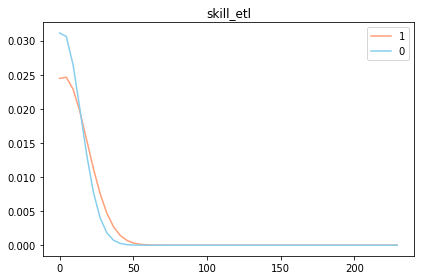

Label = 1 (Mean, Standard-Deviation): (2.70375161708, 16.0843169307)
Label = 0 (Mean, Standard-Deviation): (1.70342683219, 12.7054288933)
p-value: 8.77062216443e-08
Null hipothesis rejected



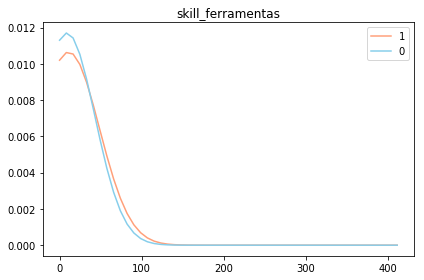

Label = 1 (Mean, Standard-Deviation): (11.0226390686, 37.4341987675)
Label = 0 (Mean, Standard-Deviation): (8.99129786772, 34.0733217862)
p-value: 5.04384441159e-05
Null hipothesis rejected



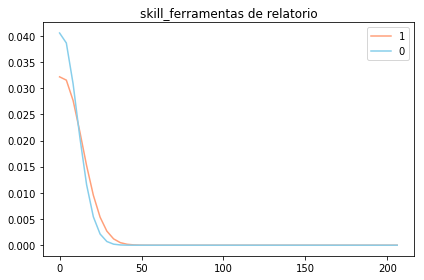

Label = 1 (Mean, Standard-Deviation): (1.33203967227, 12.3300404002)
Label = 0 (Mean, Standard-Deviation): (0.936335499492, 9.79543562839)
p-value: 0.00604412551463
Null hipothesis rejected



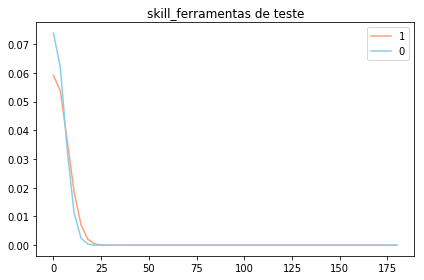

Label = 1 (Mean, Standard-Deviation): (0.558430357913, 6.72008031067)
Label = 0 (Mean, Standard-Deviation): (0.352139129044, 5.38816179297)
p-value: 0.00926741793176
Null hipothesis rejected



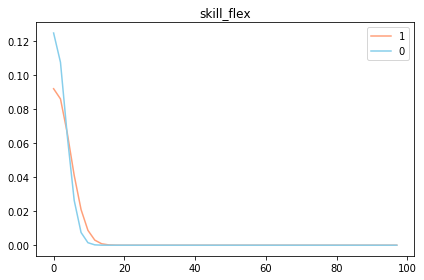

Label = 1 (Mean, Standard-Deviation): (0.322552824493, 4.31833393476)
Label = 0 (Mean, Standard-Deviation): (0.192259505019, 3.18769889213)
p-value: 0.00548840305688
Null hipothesis rejected



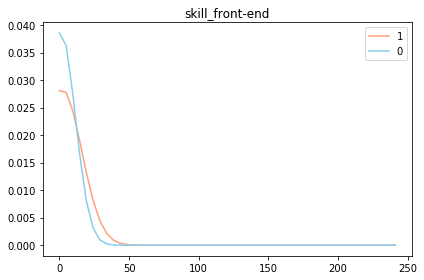

Label = 1 (Mean, Standard-Deviation): (1.89197930142, 14.0720201501)
Label = 0 (Mean, Standard-Deviation): (1.05120261766, 10.2894863166)
p-value: 2.83917996505e-08
Null hipothesis rejected



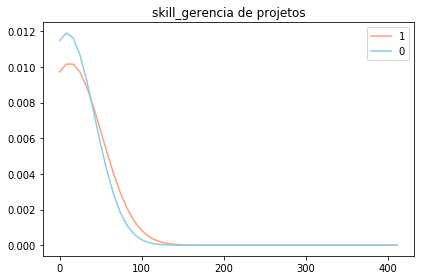

Label = 1 (Mean, Standard-Deviation): (12.3479948254, 39.0625771895)
Label = 0 (Mean, Standard-Deviation): (9.13137598648, 33.5121119895)
p-value: 6.80034360796e-11
Null hipothesis rejected



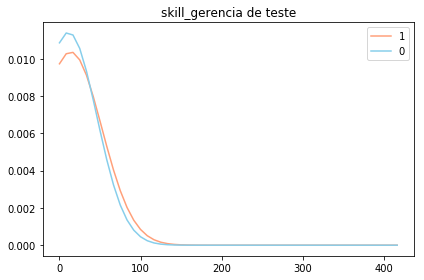

Label = 1 (Mean, Standard-Deviation): (13.7380336352, 38.4379584755)
Label = 0 (Mean, Standard-Deviation): (11.1037574664, 34.9166055432)
p-value: 2.90114972226e-07
Null hipothesis rejected



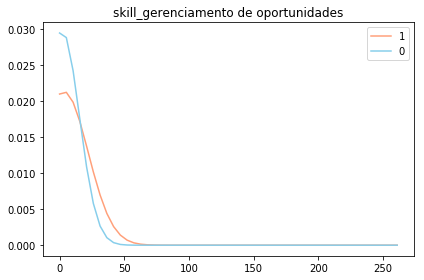

Label = 1 (Mean, Standard-Deviation): (3.36200948685, 18.6872837043)
Label = 0 (Mean, Standard-Deviation): (1.8620296029, 13.399527667)
p-value: 2.87130252968e-14
Null hipothesis rejected



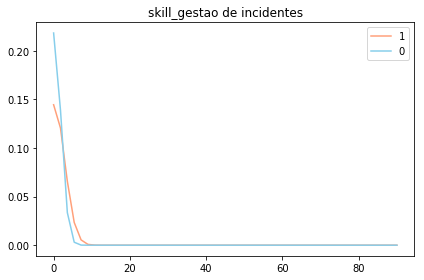

Label = 1 (Mean, Standard-Deviation): (0.134540750323, 2.75810955171)
Label = 0 (Mean, Standard-Deviation): (0.0620986991629, 1.82665935948)
p-value: 0.00708726120903
Null hipothesis rejected



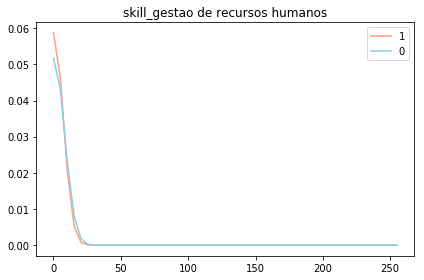

Label = 1 (Mean, Standard-Deviation): (0.413540319103, 6.78771354173)
Label = 0 (Mean, Standard-Deviation): (0.444914286367, 7.70334236201)
p-value: 0.78171669205
Alternative hipothesis rejected



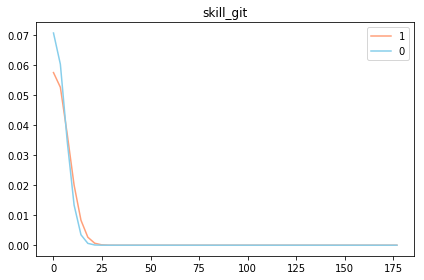

Label = 1 (Mean, Standard-Deviation): (0.572660629582, 6.90199697008)
Label = 0 (Mean, Standard-Deviation): (0.348237188639, 5.62307681392)
p-value: 0.00667471925159
Null hipothesis rejected



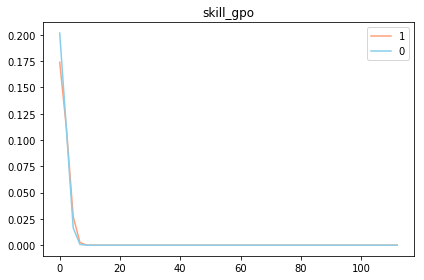

Label = 1 (Mean, Standard-Deviation): (0.0625269512721, 2.29262213493)
Label = 0 (Mean, Standard-Deviation): (0.0549241083155, 1.97674803665)
p-value: 0.793732091633
Alternative hipothesis rejected



/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


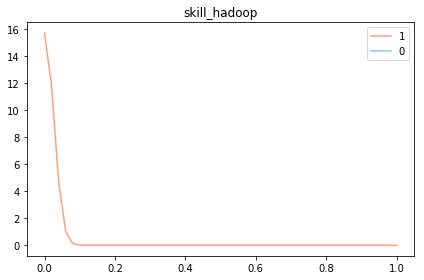

Label = 1 (Mean, Standard-Deviation): (0.000646830530401, 0.0254246364903)
Label = 0 (Mean, Standard-Deviation): (0.0, 0.0)
p-value: 2.13147254911e-248
Null hipothesis rejected



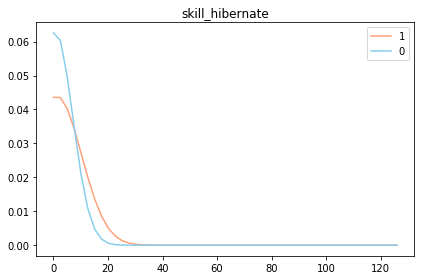

Label = 1 (Mean, Standard-Deviation): (1.20720137991, 9.07633621815)
Label = 0 (Mean, Standard-Deviation): (0.685083772085, 6.34374876363)
p-value: 2.27076727674e-08
Null hipothesis rejected



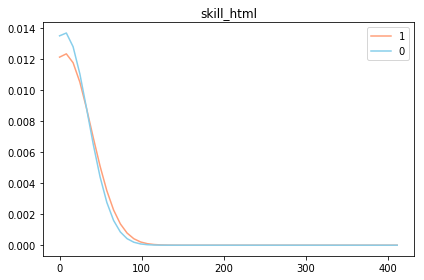

Label = 1 (Mean, Standard-Deviation): (6.30746011212, 32.2858805949)
Label = 0 (Mean, Standard-Deviation): (5.48280816364, 29.0373808483)
p-value: 0.05349076343
Alternative hipothesis rejected



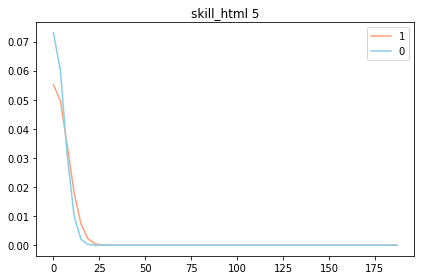

Label = 1 (Mean, Standard-Deviation): (0.428417421302, 7.22674907817)
Label = 0 (Mean, Standard-Deviation): (0.329931817403, 5.4581339379)
p-value: 0.220201665666
Alternative hipothesis rejected



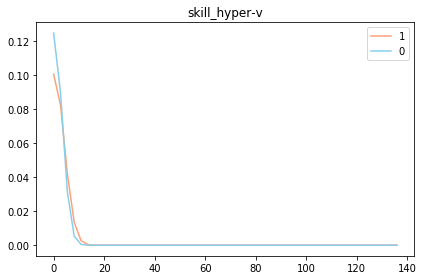

Label = 1 (Mean, Standard-Deviation): (0.216688227684, 3.95673094589)
Label = 0 (Mean, Standard-Deviation): (0.136652428648, 3.19143184023)
p-value: 0.0882991628059
Alternative hipothesis rejected



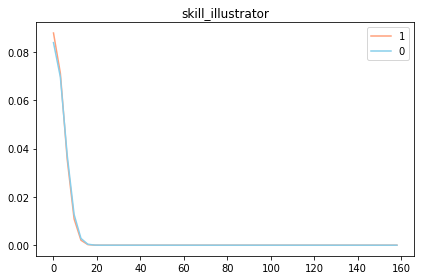

Label = 1 (Mean, Standard-Deviation): (0.21021992238, 4.53314266276)
Label = 0 (Mean, Standard-Deviation): (0.254288536872, 4.74677198386)
p-value: 0.527714762237
Alternative hipothesis rejected



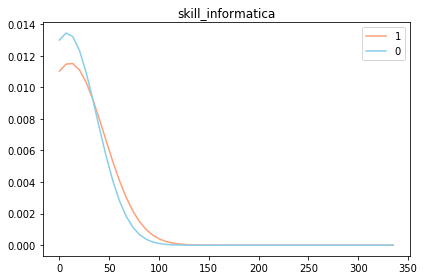

Label = 1 (Mean, Standard-Deviation): (10.4982751186, 34.5650653743)
Label = 0 (Mean, Standard-Deviation): (7.81851837047, 29.6645188363)
p-value: 8.19869937275e-10
Null hipothesis rejected



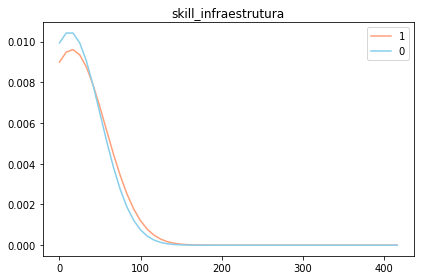

Label = 1 (Mean, Standard-Deviation): (15.176800345, 41.5182826349)
Label = 0 (Mean, Standard-Deviation): (12.4842546169, 38.0637813761)
p-value: 1.51042831821e-06
Null hipothesis rejected



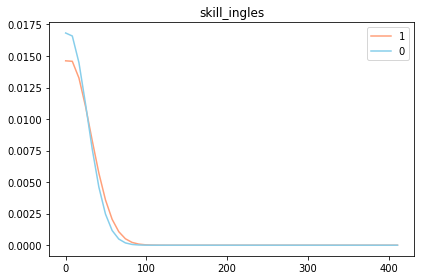

Label = 1 (Mean, Standard-Deviation): (3.87839586028, 27.0138331008)
Label = 0 (Mean, Standard-Deviation): (3.15783471716, 23.5025048395)
p-value: 0.0371316738765
Null hipothesis rejected



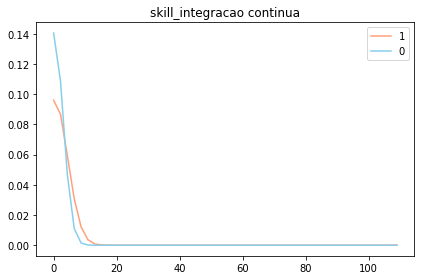

Label = 1 (Mean, Standard-Deviation): (0.282664941785, 4.14424132375)
Label = 0 (Mean, Standard-Deviation): (0.145621809294, 2.83622111622)
p-value: 0.00103298763096
Null hipothesis rejected



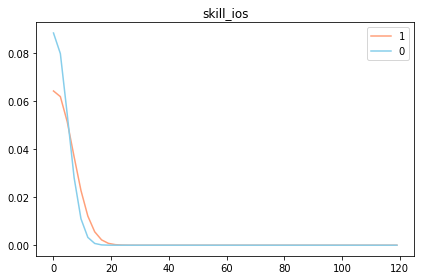

Label = 1 (Mean, Standard-Deviation): (0.591849935317, 6.18530112143)
Label = 0 (Mean, Standard-Deviation): (0.318472686988, 4.50475522087)
p-value: 3.74582505e-05
Null hipothesis rejected



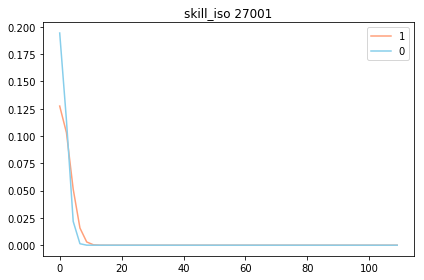

Label = 1 (Mean, Standard-Deviation): (0.139068564036, 3.12763216534)
Label = 0 (Mean, Standard-Deviation): (0.0661496819288, 2.05158066178)
p-value: 0.0158154864471
Null hipothesis rejected



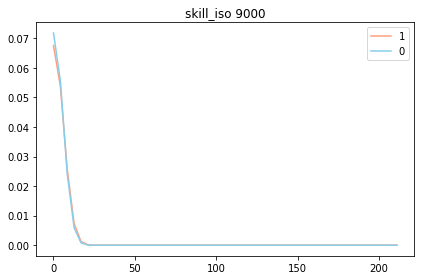

Label = 1 (Mean, Standard-Deviation): (0.227253126348, 5.90123680046)
Label = 0 (Mean, Standard-Deviation): (0.244211331788, 5.55260731351)
p-value: 0.835477085189
Alternative hipothesis rejected



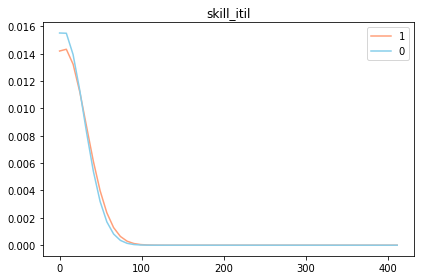

Label = 1 (Mean, Standard-Deviation): (4.95752479517, 27.6547222682)
Label = 0 (Mean, Standard-Deviation): (4.01920990418, 25.3959027355)
p-value: 0.0119952527675
Null hipothesis rejected



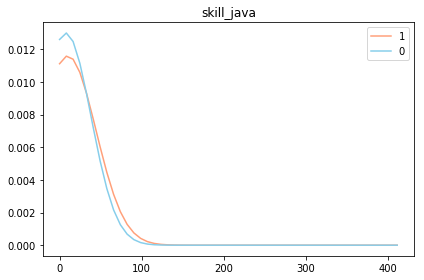

Label = 1 (Mean, Standard-Deviation): (9.99223803364, 34.3868102784)
Label = 0 (Mean, Standard-Deviation): (7.6508999646, 30.6705134557)
p-value: 2.10059489343e-07
Null hipothesis rejected



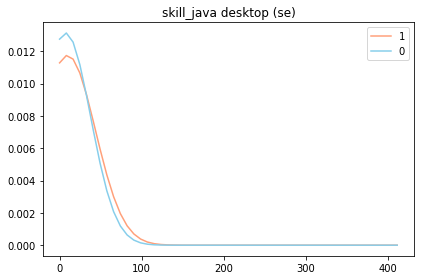

Label = 1 (Mean, Standard-Deviation): (9.65329883571, 33.9650992287)
Label = 0 (Mean, Standard-Deviation): (7.39879566921, 30.3759963458)
p-value: 4.50642968346e-07
Null hipothesis rejected



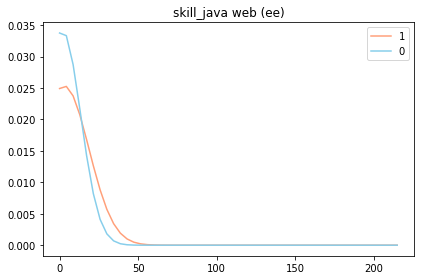

Label = 1 (Mean, Standard-Deviation): (2.92173350582, 15.7348569835)
Label = 0 (Mean, Standard-Deviation): (1.75096734773, 11.6882766408)
p-value: 1.00895652887e-11
Null hipothesis rejected



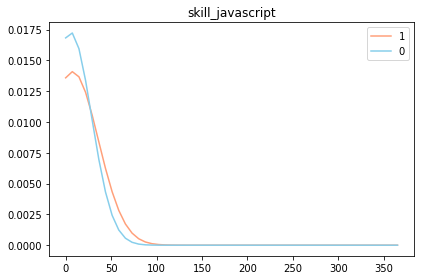

Label = 1 (Mean, Standard-Deviation): (7.6282880552, 28.3270387268)
Label = 0 (Mean, Standard-Deviation): (5.35109126418, 23.0863309691)
p-value: 2.02580584834e-11
Null hipothesis rejected



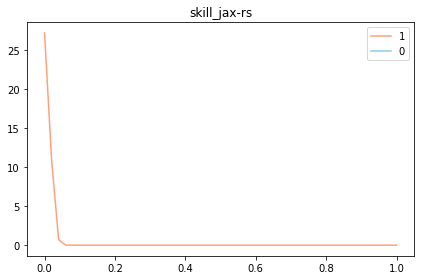

Label = 1 (Mean, Standard-Deviation): (0.0002156101768, 0.0146820873534)
Label = 0 (Mean, Standard-Deviation): (0.0, 0.0)
p-value: 4.11869594424e-84
Null hipothesis rejected



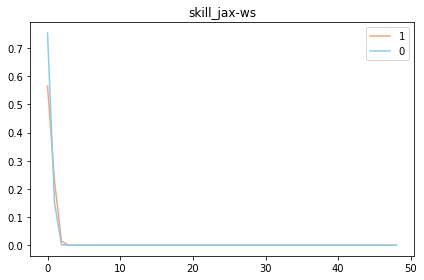

Label = 1 (Mean, Standard-Deviation): (0.0109961190168, 0.705189168412)
Label = 0 (Mean, Standard-Deviation): (0.00896709647209, 0.529332497219)
p-value: 0.794525615224
Alternative hipothesis rejected



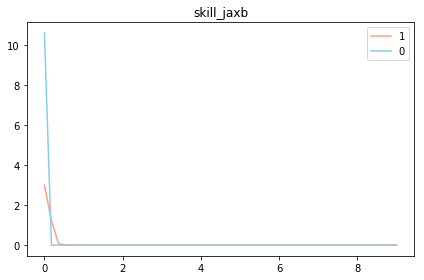

Label = 1 (Mean, Standard-Deviation): (0.002156101768, 0.132948808655)
Label = 0 (Mean, Standard-Deviation): (0.000257540629747, 0.0375934355579)
p-value: 0.000714982112356
Null hipothesis rejected



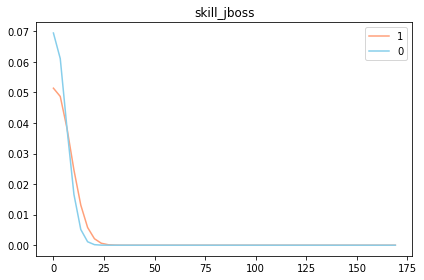

Label = 1 (Mean, Standard-Deviation): (0.73178094006, 7.72994958791)
Label = 0 (Mean, Standard-Deviation): (0.440520106443, 5.72896633554)
p-value: 0.000552283529667
Null hipothesis rejected



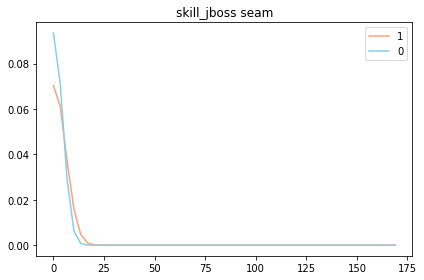

Label = 1 (Mean, Standard-Deviation): (0.353385079776, 5.65753649958)
Label = 0 (Mean, Standard-Deviation): (0.225711805754, 4.26146479198)
p-value: 0.0417895219988
Null hipothesis rejected



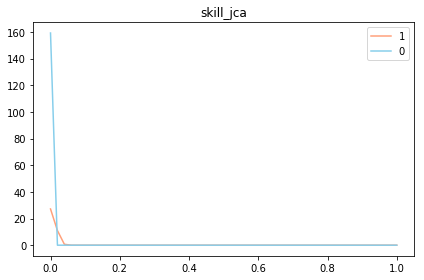

Label = 1 (Mean, Standard-Deviation): (0.0002156101768, 0.0146820873534)
Label = 0 (Mean, Standard-Deviation): (6.28147877431e-06, 0.00250627997585)
p-value: 5.15358752939e-08
Null hipothesis rejected



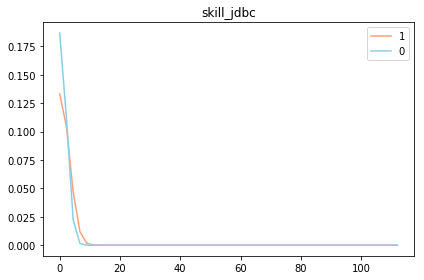

Label = 1 (Mean, Standard-Deviation): (0.147908581285, 2.99145450701)
Label = 0 (Mean, Standard-Deviation): (0.0753286355486, 2.133619774)
p-value: 0.0208514384276
Null hipothesis rejected



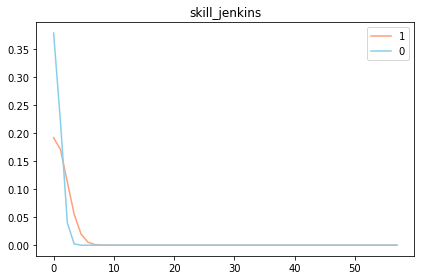

Label = 1 (Mean, Standard-Deviation): (0.128934885727, 2.07912150042)
Label = 0 (Mean, Standard-Deviation): (0.0386727806393, 1.05439978533)
p-value: 6.62599563578e-09
Null hipothesis rejected



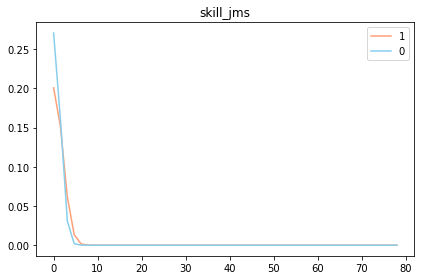

Label = 1 (Mean, Standard-Deviation): (0.0595084087969, 1.98645562948)
Label = 0 (Mean, Standard-Deviation): (0.0448400507087, 1.47312715045)
p-value: 0.498727937525
Alternative hipothesis rejected



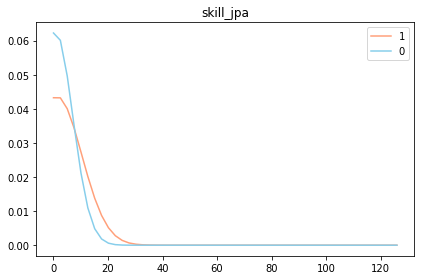

Label = 1 (Mean, Standard-Deviation): (1.2360931436, 9.14082340044)
Label = 0 (Mean, Standard-Deviation): (0.696183145079, 6.37270485183)
p-value: 8.70831701942e-09
Null hipothesis rejected



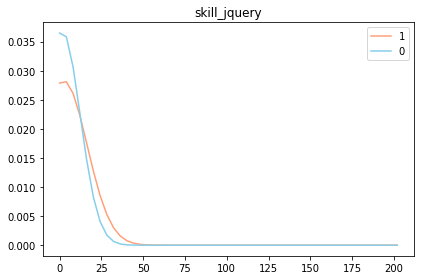

Label = 1 (Mean, Standard-Deviation): (2.41591203105, 14.0988372298)
Label = 0 (Mean, Standard-Deviation): (1.50039630421, 10.8282925039)
p-value: 9.18778082138e-09
Null hipothesis rejected



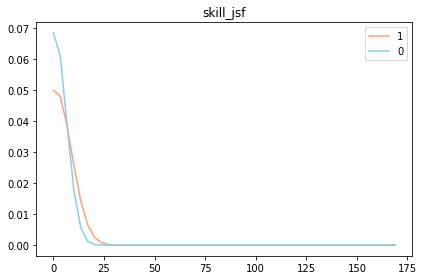

Label = 1 (Mean, Standard-Deviation): (0.933160845192, 7.9347989829)
Label = 0 (Mean, Standard-Deviation): (0.545336287532, 5.80946954729)
p-value: 5.75605150653e-06
Null hipothesis rejected



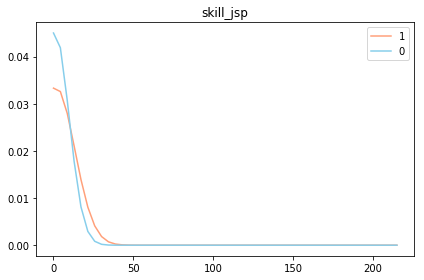

Label = 1 (Mean, Standard-Deviation): (1.42820181113, 11.8881120498)
Label = 0 (Mean, Standard-Deviation): (0.851018170605, 8.82183648751)
p-value: 8.78701103875e-06
Null hipothesis rejected



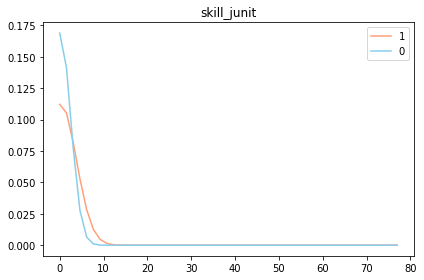

Label = 1 (Mean, Standard-Deviation): (0.258516601984, 3.54819702875)
Label = 0 (Mean, Standard-Deviation): (0.130345252915, 2.35803870613)
p-value: 0.0002236585437
Null hipothesis rejected



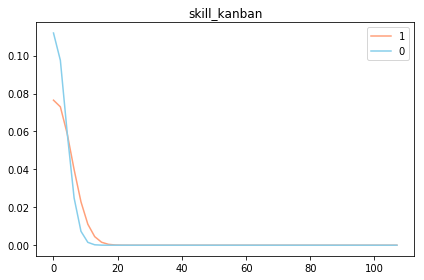

Label = 1 (Mean, Standard-Deviation): (0.478870202674, 5.19136654517)
Label = 0 (Mean, Standard-Deviation): (0.254922966228, 3.55417246801)
p-value: 1.8769067864e-05
Null hipothesis rejected



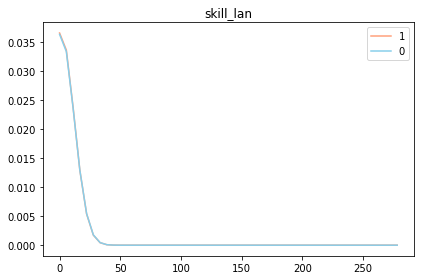

Label = 1 (Mean, Standard-Deviation): (1.01078050884, 10.8413374184)
Label = 0 (Mean, Standard-Deviation): (0.956388263913, 10.9163195097)
p-value: 0.734692277035
Alternative hipothesis rejected



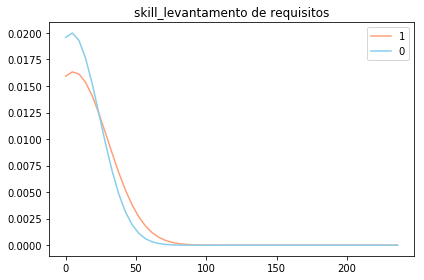

Label = 1 (Mean, Standard-Deviation): (5.52393272962, 24.4256881099)
Label = 0 (Mean, Standard-Deviation): (4.11726550098, 19.9493180597)
p-value: 1.64676120006e-06
Null hipothesis rejected



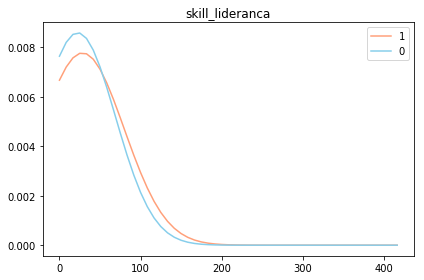

Label = 1 (Mean, Standard-Deviation): (28.3673997413, 51.2707891781)
Label = 0 (Mean, Standard-Deviation): (22.4600931943, 46.3993026039)
p-value: 4.86890673403e-18
Null hipothesis rejected



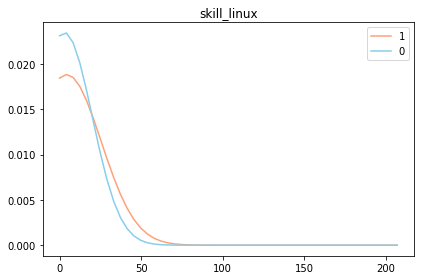

Label = 1 (Mean, Standard-Deviation): (4.35424752048, 21.1880681685)
Label = 0 (Mean, Standard-Deviation): (2.97331742025, 17.0046636309)
p-value: 3.40555481806e-08
Null hipothesis rejected



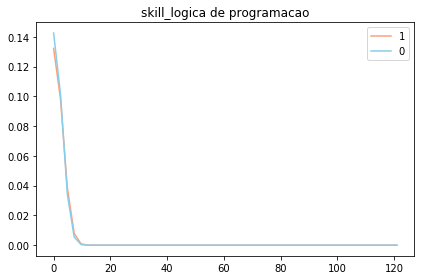

Label = 1 (Mean, Standard-Deviation): (0.103061664511, 3.01379380682)
Label = 0 (Mean, Standard-Deviation): (0.114437693441, 2.79466405833)
p-value: 0.781937479635
Alternative hipothesis rejected



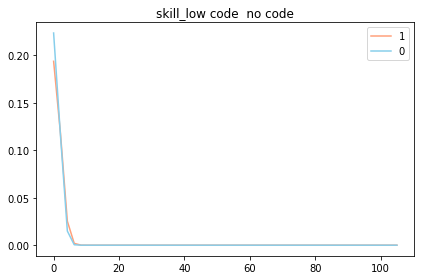

Label = 1 (Mean, Standard-Deviation): (0.0429064251833, 2.05919626729)
Label = 0 (Mean, Standard-Deviation): (0.0466325563334, 1.78449133036)
p-value: 0.887117202878
Alternative hipothesis rejected



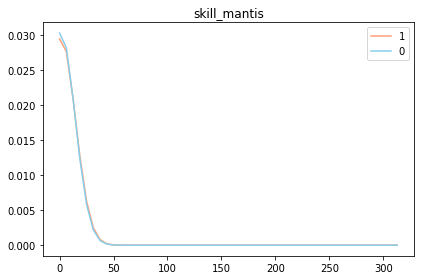

Label = 1 (Mean, Standard-Deviation): (1.27274687365, 13.4868051979)
Label = 0 (Mean, Standard-Deviation): (1.14164734636, 13.1266185136)
p-value: 0.497001876389
Alternative hipothesis rejected



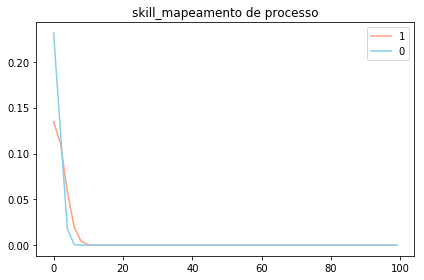

Label = 1 (Mean, Standard-Deviation): (0.128934885727, 2.95856453815)
Label = 0 (Mean, Standard-Deviation): (0.0515880720429, 1.72297857055)
p-value: 0.00232405962712
Null hipothesis rejected



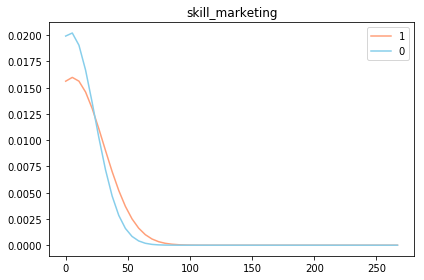

Label = 1 (Mean, Standard-Deviation): (5.35187580854, 24.9562261819)
Label = 0 (Mean, Standard-Deviation): (3.71978323188, 19.6691122254)
p-value: 1.71077326929e-08
Null hipothesis rejected



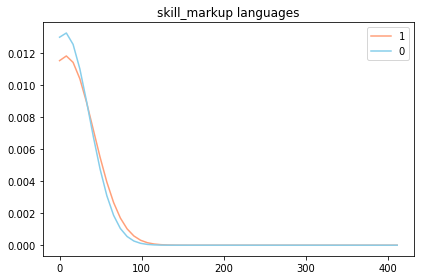

Label = 1 (Mean, Standard-Deviation): (7.56964208711, 33.7103207907)
Label = 0 (Mean, Standard-Deviation): (6.29857182014, 30.0067523421)
p-value: 0.00397691928119
Null hipothesis rejected



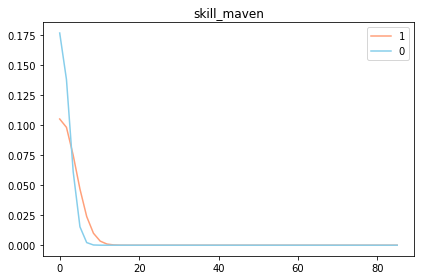

Label = 1 (Mean, Standard-Deviation): (0.272962483829, 3.78629281211)
Label = 0 (Mean, Standard-Deviation): (0.111260978312, 2.25497746887)
p-value: 1.14215859577e-06
Null hipothesis rejected



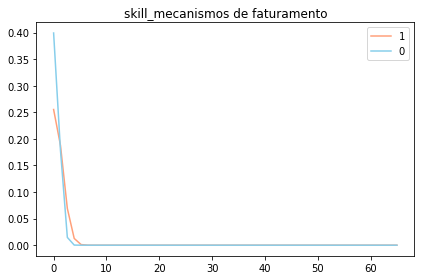

Label = 1 (Mean, Standard-Deviation): (0.0735230702889, 1.56130498989)
Label = 0 (Mean, Standard-Deviation): (0.0305508285842, 0.999047482796)
p-value: 0.00350156221119
Null hipothesis rejected



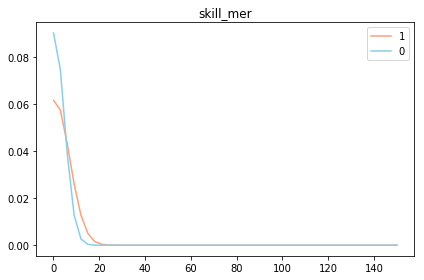

Label = 1 (Mean, Standard-Deviation): (0.526735661923, 6.45333841584)
Label = 0 (Mean, Standard-Deviation): (0.275326351375, 4.41370535381)
p-value: 0.000109612742825
Null hipothesis rejected



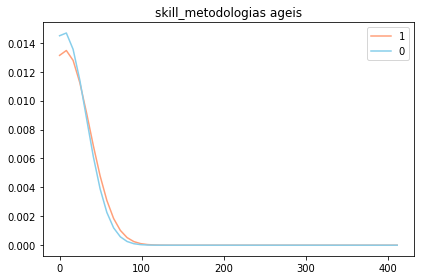

Label = 1 (Mean, Standard-Deviation): (6.80595084088, 29.5757822992)
Label = 0 (Mean, Standard-Deviation): (5.26180803801, 27.005031409)
p-value: 0.000101103754007
Null hipothesis rejected



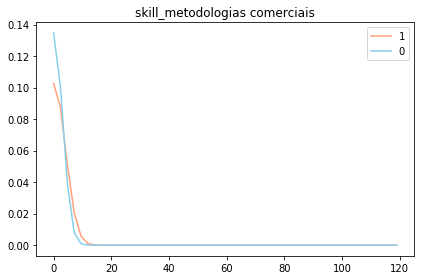

Label = 1 (Mean, Standard-Deviation): (0.173134971971, 3.8862650142)
Label = 0 (Mean, Standard-Deviation): (0.112024463505, 2.96143419808)
p-value: 0.160874201598
Alternative hipothesis rejected



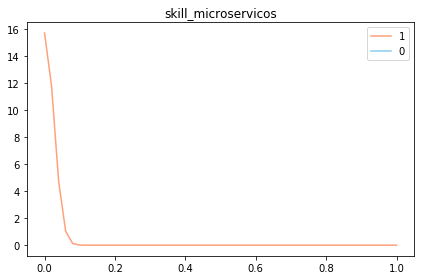

Label = 1 (Mean, Standard-Deviation): (0.000646830530401, 0.0254246364903)
Label = 0 (Mean, Standard-Deviation): (0.0, 0.0)
p-value: 2.13147254911e-248
Null hipothesis rejected



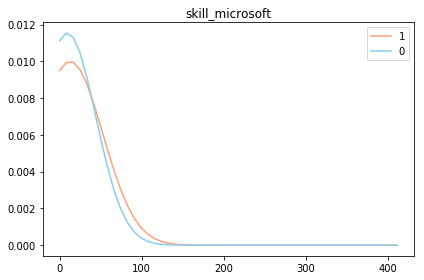

Label = 1 (Mean, Standard-Deviation): (12.7736093144, 39.8759511635)
Label = 0 (Mean, Standard-Deviation): (9.55030665037, 34.5239695938)
p-value: 2.19376133971e-10
Null hipothesis rejected



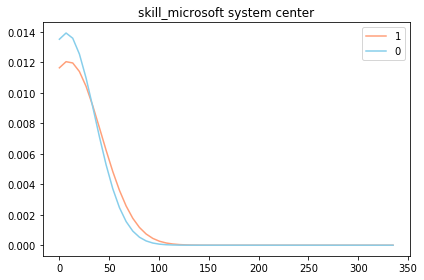

Label = 1 (Mean, Standard-Deviation): (8.90275981026, 33.0455509863)
Label = 0 (Mean, Standard-Deviation): (6.99979042703, 28.6424509798)
p-value: 6.2810796467e-06
Null hipothesis rejected



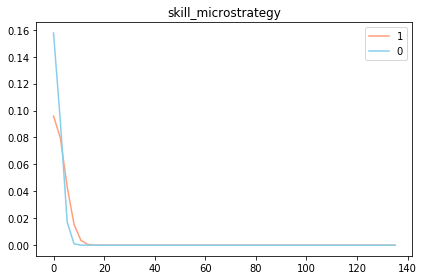

Label = 1 (Mean, Standard-Deviation): (0.165157395429, 4.15684023101)
Label = 0 (Mean, Standard-Deviation): (0.0722724106031, 2.53012831194)
p-value: 0.0127287350677
Null hipothesis rejected



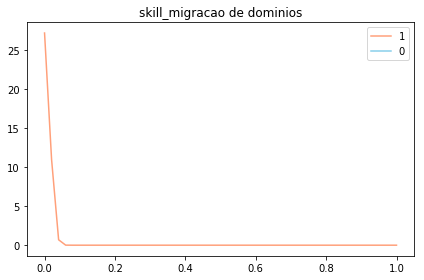

Label = 1 (Mean, Standard-Deviation): (0.0002156101768, 0.0146820873534)
Label = 0 (Mean, Standard-Deviation): (0.0, 0.0)
p-value: 4.11869594424e-84
Null hipothesis rejected



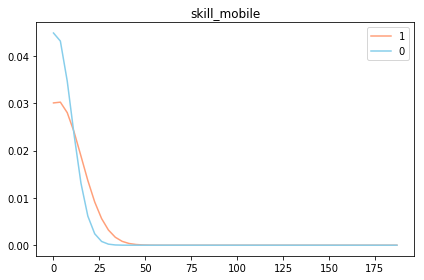

Label = 1 (Mean, Standard-Deviation): (2.1142733937, 13.0974836625)
Label = 0 (Mean, Standard-Deviation): (1.05964549618, 8.8336780259)
p-value: 5.19016668989e-16
Null hipothesis rejected



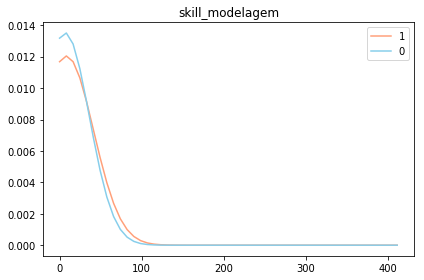

Label = 1 (Mean, Standard-Deviation): (8.22703751617, 33.1204367584)
Label = 0 (Mean, Standard-Deviation): (6.70923720006, 29.4996912572)
p-value: 0.000468507487103
Null hipothesis rejected



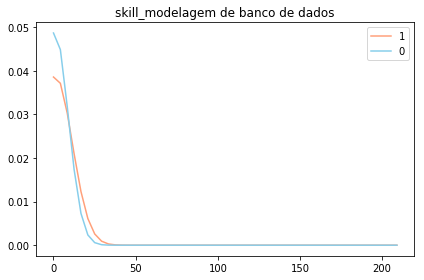

Label = 1 (Mean, Standard-Deviation): (1.13001293661, 10.2849086053)
Label = 0 (Mean, Standard-Deviation): (0.792600989047, 8.16189150671)
p-value: 0.00496246257819
Null hipothesis rejected



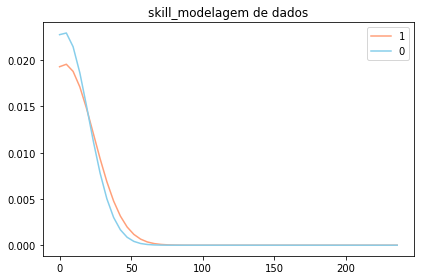

Label = 1 (Mean, Standard-Deviation): (3.56382061233, 20.3563690608)
Label = 0 (Mean, Standard-Deviation): (2.85483902283, 17.2851524458)
p-value: 0.00529952766146
Null hipothesis rejected



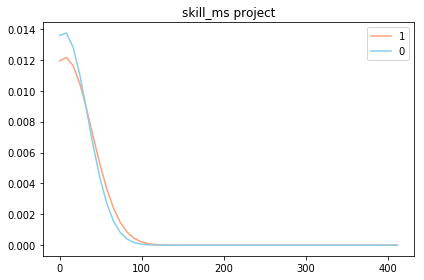

Label = 1 (Mean, Standard-Deviation): (6.57761966365, 32.7694704998)
Label = 0 (Mean, Standard-Deviation): (5.28450473395, 28.8811615118)
p-value: 0.00233437864392
Null hipothesis rejected



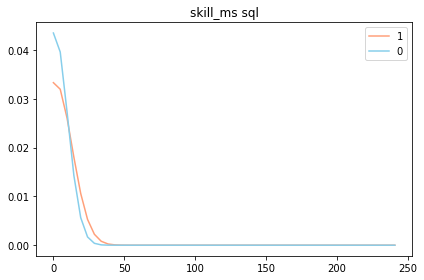

Label = 1 (Mean, Standard-Deviation): (1.19297110824, 11.9222388043)
Label = 0 (Mean, Standard-Deviation): (0.782898388515, 9.14423694541)
p-value: 0.00230975878613
Null hipothesis rejected



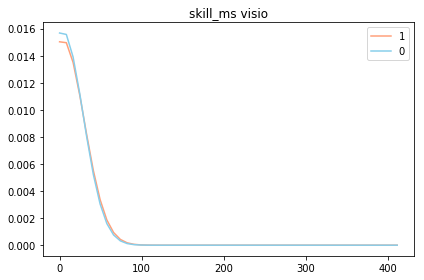

Label = 1 (Mean, Standard-Deviation): (3.72897800776, 26.2741144718)
Label = 0 (Mean, Standard-Deviation): (3.5883981087, 25.1846268718)
p-value: 0.704241382642
Alternative hipothesis rejected



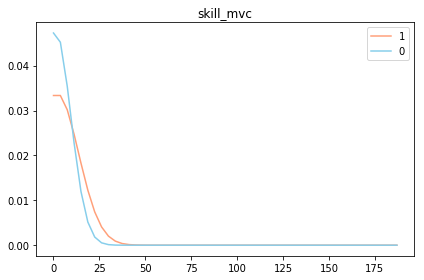

Label = 1 (Mean, Standard-Deviation): (1.87386804657, 11.8136421824)
Label = 0 (Mean, Standard-Deviation): (1.03716579678, 8.37522553065)
p-value: 1.15515987817e-11
Null hipothesis rejected



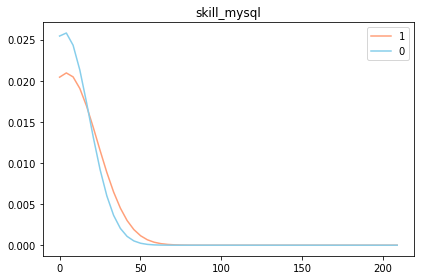

Label = 1 (Mean, Standard-Deviation): (4.25377317809, 19.0398025536)
Label = 0 (Mean, Standard-Deviation): (2.90685309334, 15.4044701466)
p-value: 2.80428000758e-09
Null hipothesis rejected



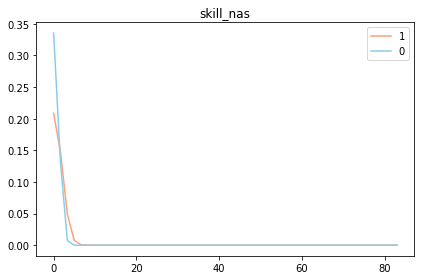

Label = 1 (Mean, Standard-Deviation): (0.0648986632169, 1.91020192363)
Label = 0 (Mean, Standard-Deviation): (0.0254114368597, 1.18883603587)
p-value: 0.0241747051136
Null hipothesis rejected



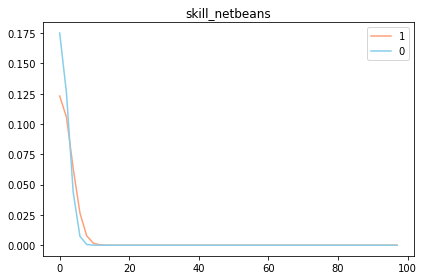

Label = 1 (Mean, Standard-Deviation): (0.149849072876, 3.23650396775)
Label = 0 (Mean, Standard-Deviation): (0.0862161513951, 2.27644134648)
p-value: 0.0576186069209
Alternative hipothesis rejected



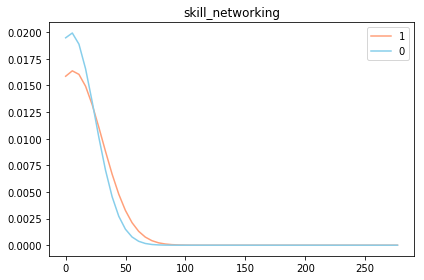

Label = 1 (Mean, Standard-Deviation): (6.13216903838, 24.3539285936)
Label = 0 (Mean, Standard-Deviation): (4.41870281753, 19.9859449215)
p-value: 5.63577816388e-09
Null hipothesis rejected



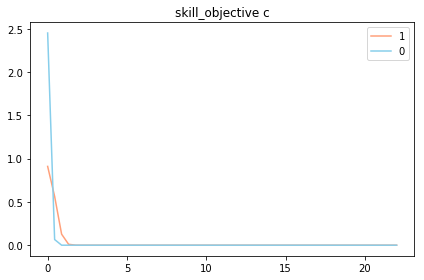

Label = 1 (Mean, Standard-Deviation): (0.0109961190168, 0.438164070749)
Label = 0 (Mean, Standard-Deviation): (0.00183133658447, 0.162740591465)
p-value: 0.000145324048243
Null hipothesis rejected



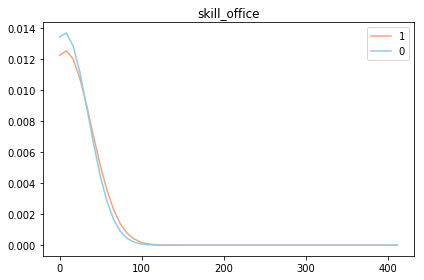

Label = 1 (Mean, Standard-Deviation): (7.0539025442, 31.837538101)
Label = 0 (Mean, Standard-Deviation): (5.9538939458, 29.1008504656)
p-value: 0.0101638336393
Null hipothesis rejected



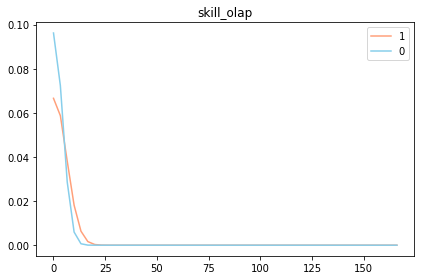

Label = 1 (Mean, Standard-Deviation): (0.306813281587, 5.98125584249)
Label = 0 (Mean, Standard-Deviation): (0.188130289291, 4.1414498207)
p-value: 0.0516214912172
Alternative hipothesis rejected



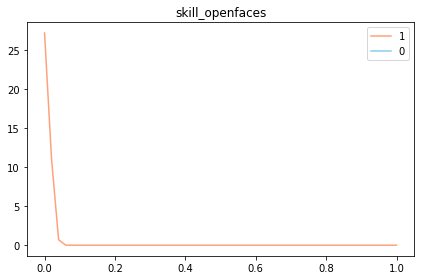

Label = 1 (Mean, Standard-Deviation): (0.0002156101768, 0.0146820873534)
Label = 0 (Mean, Standard-Deviation): (0.0, 0.0)
p-value: 4.11869594424e-84
Null hipothesis rejected



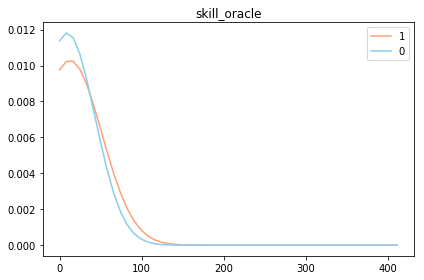

Label = 1 (Mean, Standard-Deviation): (12.5558430358, 38.7760151698)
Label = 0 (Mean, Standard-Deviation): (9.25273187222, 33.7637230189)
p-value: 2.91380448123e-11
Null hipothesis rejected



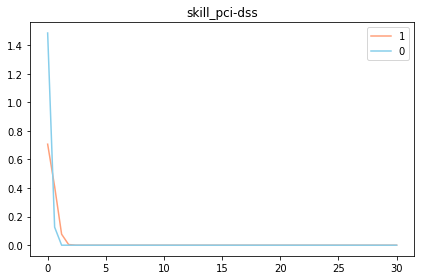

Label = 1 (Mean, Standard-Deviation): (0.011858559724, 0.56419465231)
Label = 0 (Mean, Standard-Deviation): (0.00361527655638, 0.26857613401)
p-value: 0.0376966450897
Null hipothesis rejected



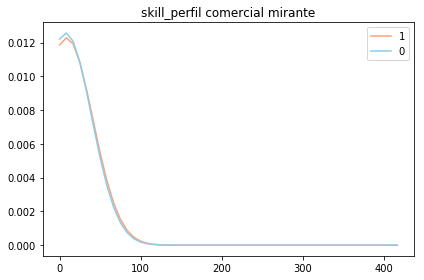

Label = 1 (Mean, Standard-Deviation): (8.64747736093, 32.4728786079)
Label = 0 (Mean, Standard-Deviation): (7.70478306056, 31.743040803)
p-value: 0.0434148688428
Null hipothesis rejected



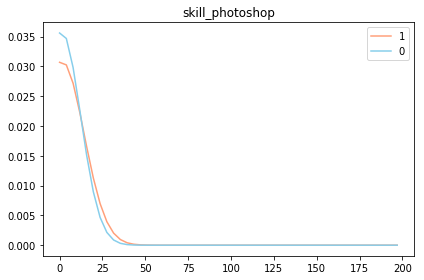

Label = 1 (Mean, Standard-Deviation): (1.36006899526, 12.9227702736)
Label = 0 (Mean, Standard-Deviation): (1.14711394602, 11.1418224111)
p-value: 0.193825661683
Alternative hipothesis rejected



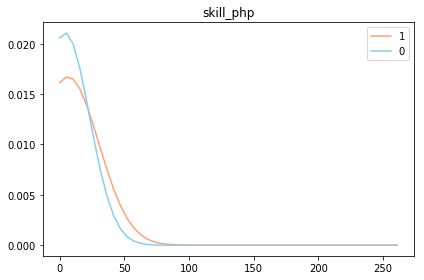

Label = 1 (Mean, Standard-Deviation): (6.42496765847, 23.848032007)
Label = 0 (Mean, Standard-Deviation): (4.22890393906, 18.9146988)
p-value: 3.01422220879e-15
Null hipothesis rejected



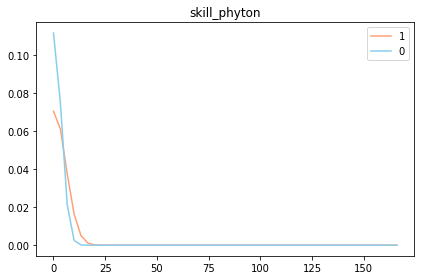

Label = 1 (Mean, Standard-Deviation): (0.289564467443, 5.65460721687)
Label = 0 (Mean, Standard-Deviation): (0.131799700773, 3.57246703039)
p-value: 0.00272136052726
Null hipothesis rejected



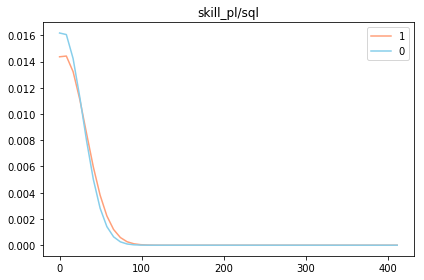

Label = 1 (Mean, Standard-Deviation): (4.46593359207, 27.4135283137)
Label = 0 (Mean, Standard-Deviation): (3.57988270766, 24.403391242)
p-value: 0.0135647254165
Null hipothesis rejected



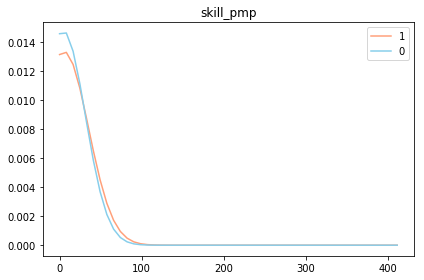

Label = 1 (Mean, Standard-Deviation): (5.34174213023, 29.8289190402)
Label = 0 (Mean, Standard-Deviation): (4.39819264724, 26.961690958)
p-value: 0.0173377518078
Null hipothesis rejected



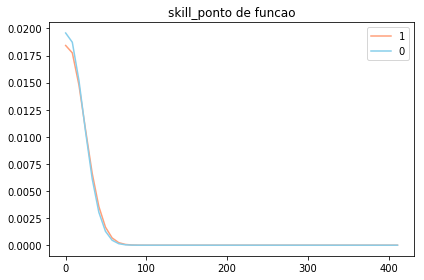

Label = 1 (Mean, Standard-Deviation): (1.98037947391, 21.5585947765)
Label = 0 (Mean, Standard-Deviation): (1.87885254514, 20.2909777472)
p-value: 0.73367006745
Alternative hipothesis rejected



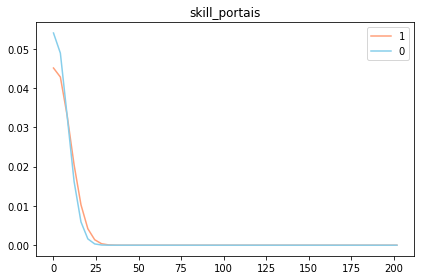

Label = 1 (Mean, Standard-Deviation): (1.02069857697, 8.78581824223)
Label = 0 (Mean, Standard-Deviation): (0.685343596889, 7.35422025597)
p-value: 0.00193746313599
Null hipothesis rejected



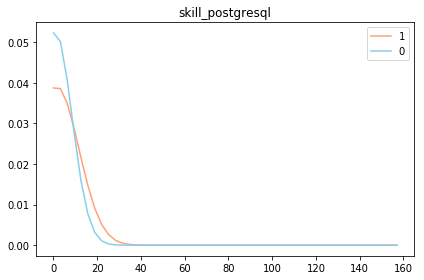

Label = 1 (Mean, Standard-Deviation): (1.43790426908, 10.2017553431)
Label = 0 (Mean, Standard-Deviation): (0.832362178645, 7.58941475234)
p-value: 5.93361567044e-08
Null hipothesis rejected



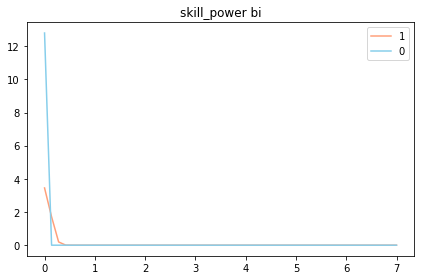

Label = 1 (Mean, Standard-Deviation): (0.0030185424752, 0.115579926298)
Label = 0 (Mean, Standard-Deviation): (0.000222135931201, 0.0311839346234)
p-value: 1.98651965139e-09
Null hipothesis rejected



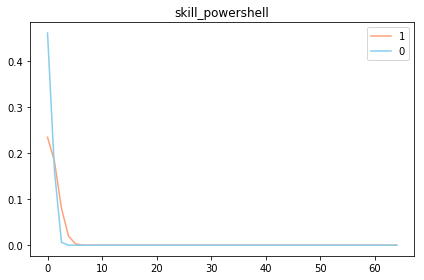

Label = 1 (Mean, Standard-Deviation): (0.0631737818025, 1.70219717498)
Label = 0 (Mean, Standard-Deviation): (0.0199362715426, 0.866307239716)
p-value: 0.000720206139643
Null hipothesis rejected



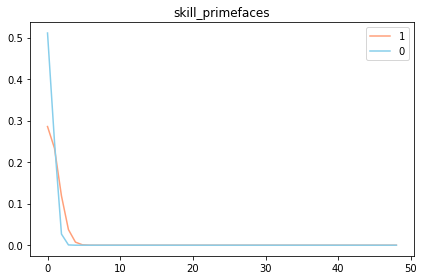

Label = 1 (Mean, Standard-Deviation): (0.0707201379905, 1.39385113958)
Label = 0 (Mean, Standard-Deviation): (0.0248632350758, 0.779996904186)
p-value: 6.69117885229e-05
Null hipothesis rejected



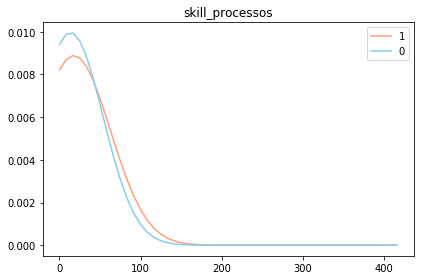

Label = 1 (Mean, Standard-Deviation): (17.7899956878, 44.8926260926)
Label = 0 (Mean, Standard-Deviation): (13.6096026679, 40.0130682701)
p-value: 1.21894643353e-12
Null hipothesis rejected



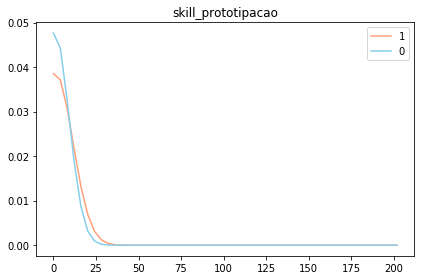

Label = 1 (Mean, Standard-Deviation): (1.02953859422, 10.295430701)
Label = 0 (Mean, Standard-Deviation): (0.733087974965, 8.3355596658)
p-value: 0.0156418249079
Null hipothesis rejected



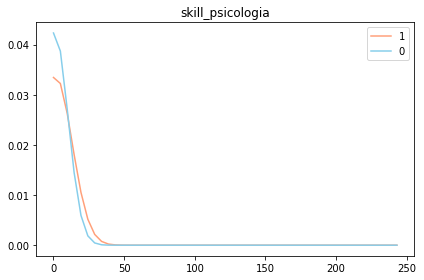

Label = 1 (Mean, Standard-Deviation): (1.37473048728, 11.8443142002)
Label = 0 (Mean, Standard-Deviation): (0.812648614077, 9.39029866972)
p-value: 4.74370525699e-05
Null hipothesis rejected



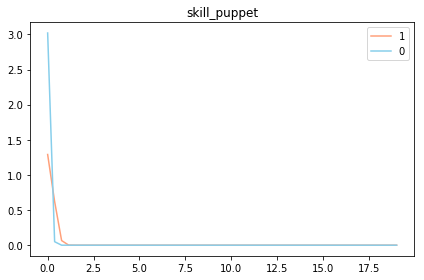

Label = 1 (Mean, Standard-Deviation): (0.00625269512721, 0.308992252534)
Label = 0 (Mean, Standard-Deviation): (0.00137907011272, 0.132084567873)
p-value: 0.012601954741
Null hipothesis rejected



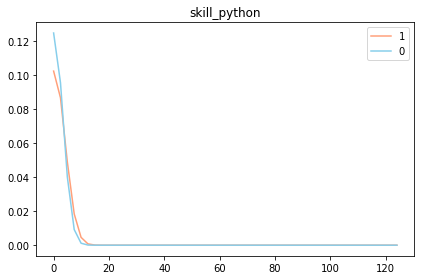

Label = 1 (Mean, Standard-Deviation): (0.224665804226, 3.8908650724)
Label = 0 (Mean, Standard-Deviation): (0.142005961694, 3.19447976487)
p-value: 0.0786174525038
Alternative hipothesis rejected



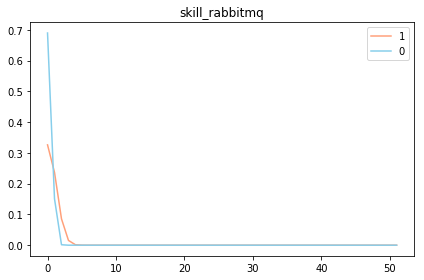

Label = 1 (Mean, Standard-Deviation): (0.0390254420009, 1.22324196834)
Label = 0 (Mean, Standard-Deviation): (0.0102707888395, 0.578571773615)
p-value: 0.000765984737775
Null hipothesis rejected



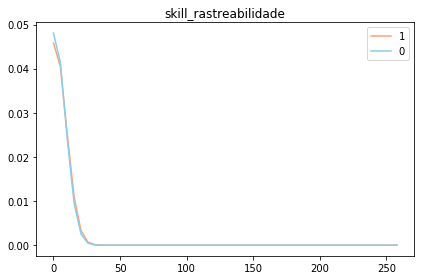

Label = 1 (Mean, Standard-Deviation): (0.790211297973, 8.67481715621)
Label = 0 (Mean, Standard-Deviation): (0.586765495266, 8.27598850838)
p-value: 0.0945801225056
Alternative hipothesis rejected



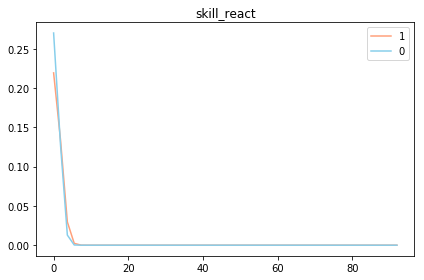

Label = 1 (Mean, Standard-Deviation): (0.0416127641225, 1.8181069495)
Label = 0 (Mean, Standard-Deviation): (0.0366204502107, 1.47640653154)
p-value: 0.818230498129
Alternative hipothesis rejected



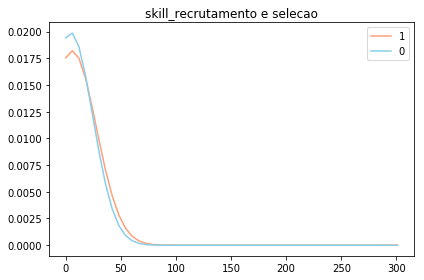

Label = 1 (Mean, Standard-Deviation): (5.92281155671, 21.9113544286)
Label = 0 (Mean, Standard-Deviation): (4.54360945191, 20.0196465056)
p-value: 2.80878901676e-06
Null hipothesis rejected



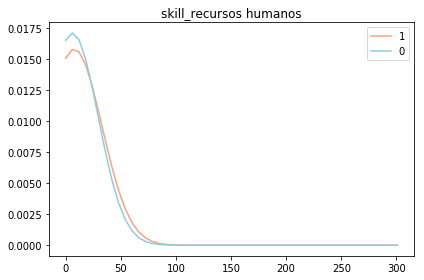

Label = 1 (Mean, Standard-Deviation): (7.79344545063, 25.1846228193)
Label = 0 (Mean, Standard-Deviation): (6.19451912425, 23.2829288972)
p-value: 3.01739121198e-06
Null hipothesis rejected



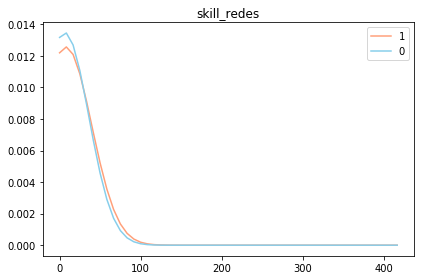

Label = 1 (Mean, Standard-Deviation): (7.80163863734, 31.7440425989)
Label = 0 (Mean, Standard-Deviation): (6.37561872566, 29.6000733502)
p-value: 0.00105308613331
Null hipothesis rejected



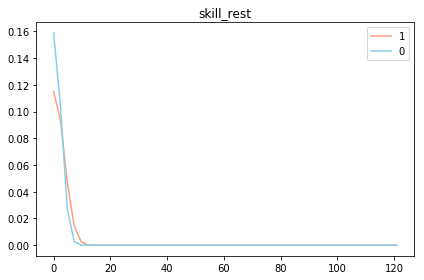

Label = 1 (Mean, Standard-Deviation): (0.178956446744, 3.46371153161)
Label = 0 (Mean, Standard-Deviation): (0.103850546489, 2.51057342575)
p-value: 0.042129839116
Null hipothesis rejected



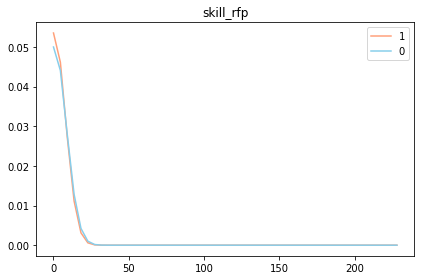

Label = 1 (Mean, Standard-Deviation): (0.482751185856, 7.43997280662)
Label = 0 (Mean, Standard-Deviation): (0.52986157905, 7.96480717828)
p-value: 0.687425595739
Alternative hipothesis rejected



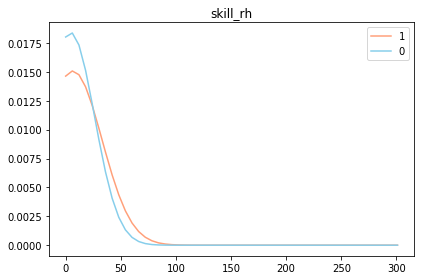

Label = 1 (Mean, Standard-Deviation): (6.49525657611, 26.4527999337)
Label = 0 (Mean, Standard-Deviation): (4.48957560045, 21.6706901796)
p-value: 3.16111416854e-10
Null hipothesis rejected



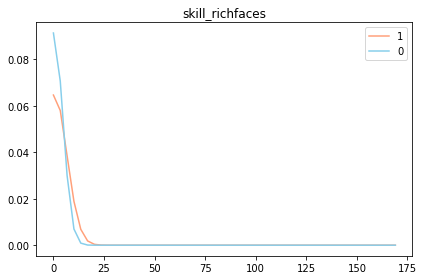

Label = 1 (Mean, Standard-Deviation): (0.474557999138, 6.15160797603)
Label = 0 (Mean, Standard-Deviation): (0.246639979899, 4.35884617907)
p-value: 0.000382838370455
Null hipothesis rejected



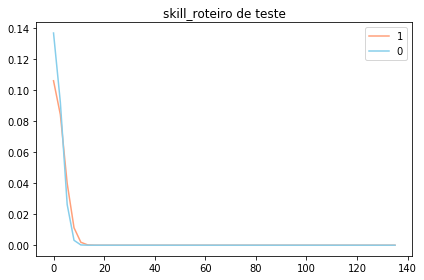

Label = 1 (Mean, Standard-Deviation): (0.145105648987, 3.75423704569)
Label = 0 (Mean, Standard-Deviation): (0.108701561233, 2.9095225849)
p-value: 0.395195501553
Alternative hipothesis rejected



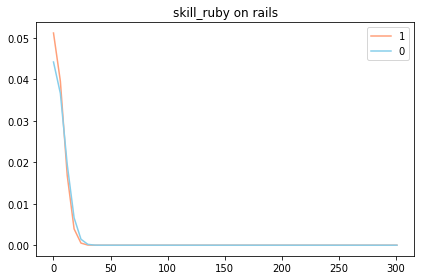

Label = 1 (Mean, Standard-Deviation): (0.417636912462, 7.7824843596)
Label = 0 (Mean, Standard-Deviation): (0.477751002181, 9.01512394755)
p-value: 0.650065318115
Alternative hipothesis rejected



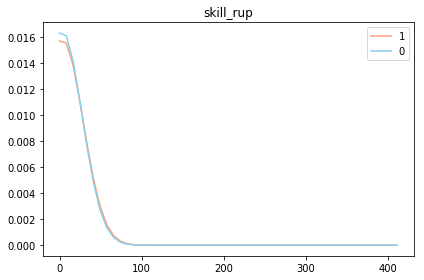

Label = 1 (Mean, Standard-Deviation): (3.2936610608, 25.2282210612)
Label = 0 (Mean, Standard-Deviation): (3.15318014139, 24.2898773065)
p-value: 0.694088819797
Alternative hipothesis rejected



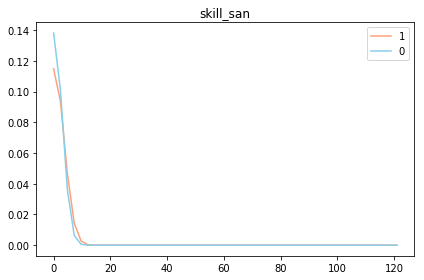

Label = 1 (Mean, Standard-Deviation): (0.188874514877, 3.46766452633)
Label = 0 (Mean, Standard-Deviation): (0.121243390171, 2.88402476292)
p-value: 0.11094066964
Alternative hipothesis rejected



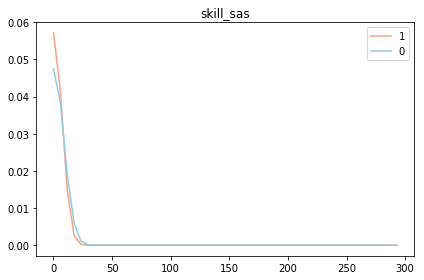

Label = 1 (Mean, Standard-Deviation): (0.256791720569, 6.98135817894)
Label = 0 (Mean, Standard-Deviation): (0.390897566212, 8.39857557795)
p-value: 0.27727963224
Alternative hipothesis rejected



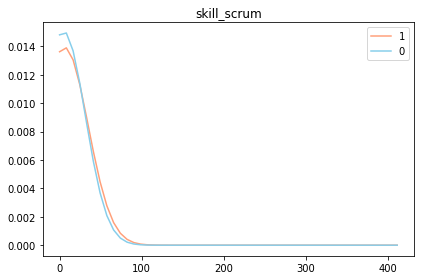

Label = 1 (Mean, Standard-Deviation): (6.09314359638, 28.6411974138)
Label = 0 (Mean, Standard-Deviation): (4.84746799301, 26.4945277716)
p-value: 0.0013886661637
Null hipothesis rejected



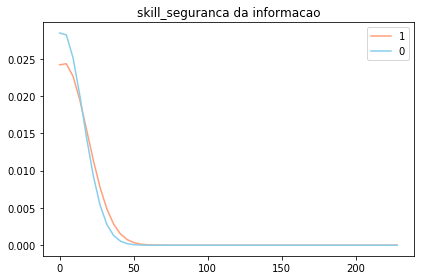

Label = 1 (Mean, Standard-Deviation): (2.6319534282, 16.2872602941)
Label = 0 (Mean, Standard-Deviation): (1.91370218938, 13.8924177116)
p-value: 0.000440445086713
Null hipothesis rejected



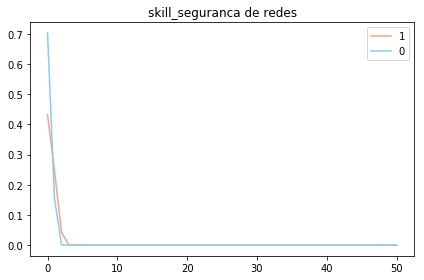

Label = 1 (Mean, Standard-Deviation): (0.0191893057352, 0.922070451768)
Label = 0 (Mean, Standard-Deviation): (0.00979339645268, 0.567538024377)
p-value: 0.261199979742
Alternative hipothesis rejected



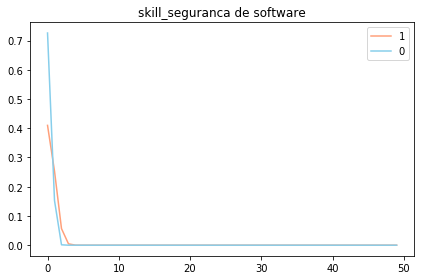

Label = 1 (Mean, Standard-Deviation): (0.0241483398016, 0.973262140895)
Label = 0 (Mean, Standard-Deviation): (0.00913498326842, 0.549662938299)
p-value: 0.0639587591854
Alternative hipothesis rejected



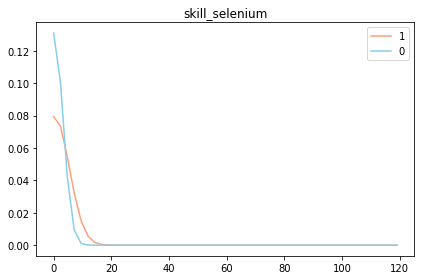

Label = 1 (Mean, Standard-Deviation): (0.394566623545, 5.00921839042)
Label = 0 (Mean, Standard-Deviation): (0.161938806976, 3.03978074682)
p-value: 2.06821816358e-07
Null hipothesis rejected



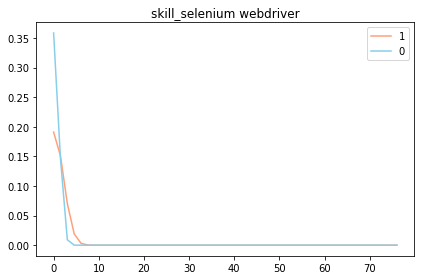

Label = 1 (Mean, Standard-Deviation): (0.0834411384217, 2.08594488903)
Label = 0 (Mean, Standard-Deviation): (0.0275968204297, 1.11233893009)
p-value: 0.000665908073609
Null hipothesis rejected



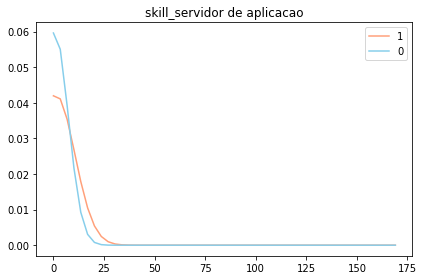

Label = 1 (Mean, Standard-Deviation): (1.14230271669, 9.43530752408)
Label = 0 (Mean, Standard-Deviation): (0.643575189301, 6.66054207729)
p-value: 3.659239235e-07
Null hipothesis rejected



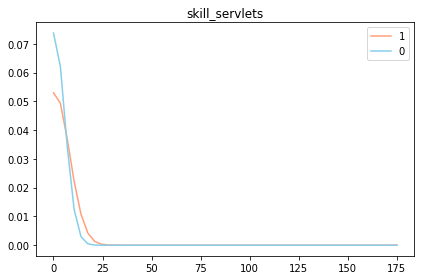

Label = 1 (Mean, Standard-Deviation): (0.598533850798, 7.50369278113)
Label = 0 (Mean, Standard-Deviation): (0.32116058886, 5.39898700454)
p-value: 0.000483265858975
Null hipothesis rejected



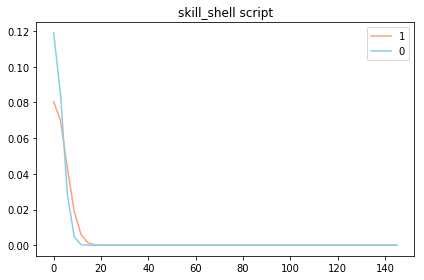

Label = 1 (Mean, Standard-Deviation): (0.272100043122, 4.95692114276)
Label = 0 (Mean, Standard-Deviation): (0.139661256981, 3.35224312764)
p-value: 0.00730057625804
Null hipothesis rejected



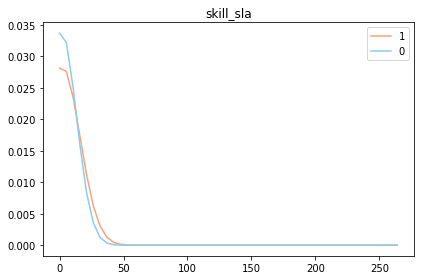

Label = 1 (Mean, Standard-Deviation): (1.93984476067, 14.0406160717)
Label = 0 (Mean, Standard-Deviation): (1.4256769721, 11.7431030963)
p-value: 0.00291819820883
Null hipothesis rejected



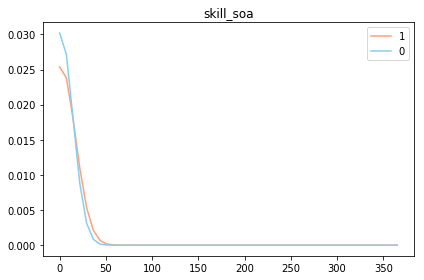

Label = 1 (Mean, Standard-Deviation): (1.54161276412, 15.6500751791)
Label = 0 (Mean, Standard-Deviation): (1.16251099259, 13.1603822083)
p-value: 0.0502153756617
Alternative hipothesis rejected



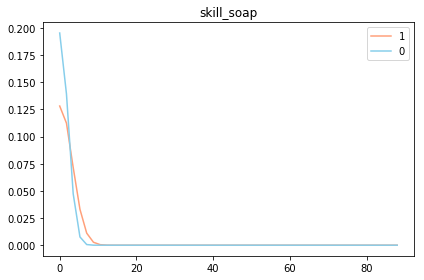

Label = 1 (Mean, Standard-Deviation): (0.159982751186, 3.1091018296)
Label = 0 (Mean, Standard-Deviation): (0.0811030276728, 2.04018062278)
p-value: 0.0086648122981
Null hipothesis rejected



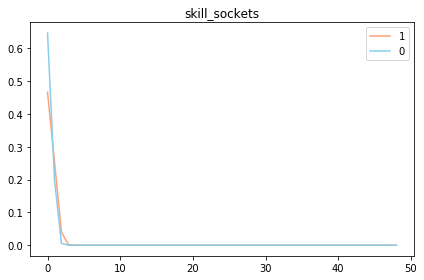

Label = 1 (Mean, Standard-Deviation): (0.0178956446744, 0.855380790139)
Label = 0 (Mean, Standard-Deviation): (0.0136485112895, 0.616583295487)
p-value: 0.639846773395
Alternative hipothesis rejected



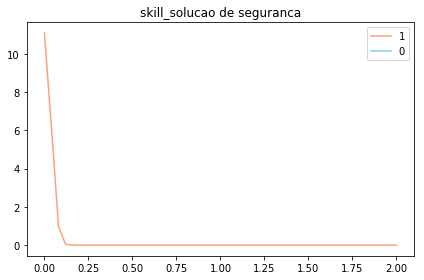

Label = 1 (Mean, Standard-Deviation): (0.000862440707201, 0.0359571586312)
Label = 0 (Mean, Standard-Deviation): (0.0, 0.0)
p-value: 5.01783474694e-221
Null hipothesis rejected



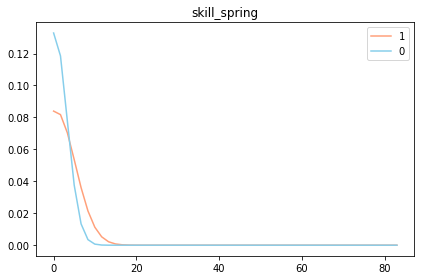

Label = 1 (Mean, Standard-Deviation): (0.472617507546, 4.7286439737)
Label = 0 (Mean, Standard-Deviation): (0.213283043434, 2.99559081863)
p-value: 4.19251035368e-09
Null hipothesis rejected



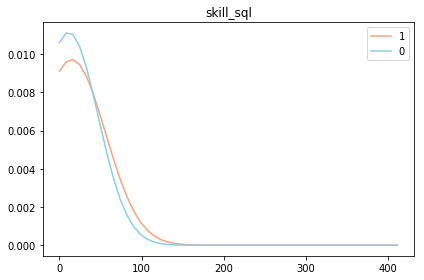

Label = 1 (Mean, Standard-Deviation): (14.8891763691, 41.024574921)
Label = 0 (Mean, Standard-Deviation): (11.2715763085, 35.7886610269)
p-value: 6.33100468536e-12
Null hipothesis rejected



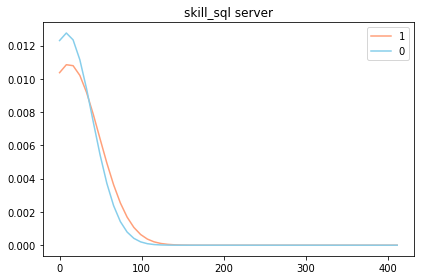

Label = 1 (Mean, Standard-Deviation): (11.4592496766, 36.6383670972)
Label = 0 (Mean, Standard-Deviation): (8.41336812892, 31.2843813289)
p-value: 3.62830449045e-11
Null hipothesis rejected



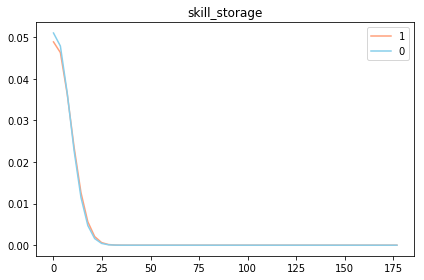

Label = 1 (Mean, Standard-Deviation): (0.767356619232, 8.13199614596)
Label = 0 (Mean, Standard-Deviation): (0.682303361162, 7.79539904048)
p-value: 0.45809895556
Alternative hipothesis rejected



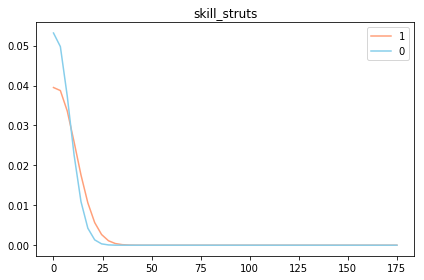

Label = 1 (Mean, Standard-Deviation): (1.19124622682, 10.0289723101)
Label = 0 (Mean, Standard-Deviation): (0.693007572037, 7.47283908777)
p-value: 5.90303107458e-06
Null hipothesis rejected



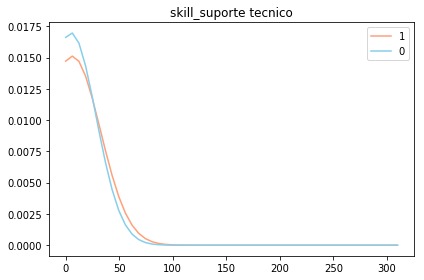

Label = 1 (Mean, Standard-Deviation): (6.14057783527, 26.3759365061)
Label = 0 (Mean, Standard-Deviation): (4.94175070524, 23.4707462379)
p-value: 0.00051522598328
Null hipothesis rejected



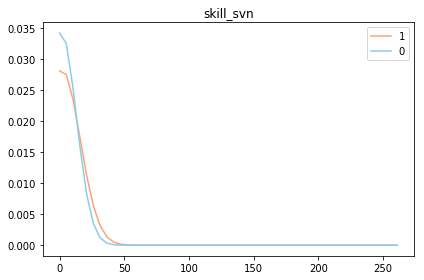

Label = 1 (Mean, Standard-Deviation): (1.78201811125, 14.0903618387)
Label = 0 (Mean, Standard-Deviation): (1.30429139209, 11.5951104123)
p-value: 0.00510377551954
Null hipothesis rejected



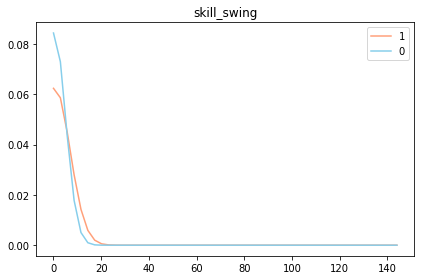

Label = 1 (Mean, Standard-Deviation): (0.566623544631, 6.36334969537)
Label = 0 (Mean, Standard-Deviation): (0.320482760196, 4.71269383163)
p-value: 0.000387578587572
Null hipothesis rejected



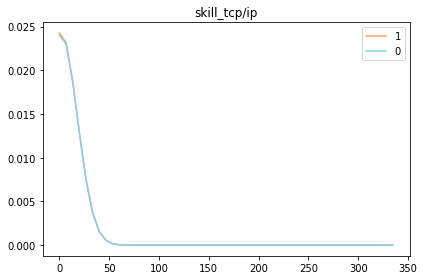

Label = 1 (Mean, Standard-Deviation): (1.54657179819, 16.3688578867)
Label = 0 (Mean, Standard-Deviation): (1.54040132939, 16.5313808338)
p-value: 0.979746299911
Alternative hipothesis rejected



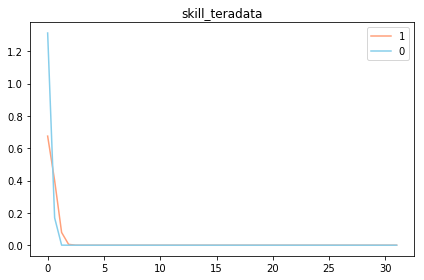

Label = 1 (Mean, Standard-Deviation): (0.0153083225528, 0.590990483725)
Label = 0 (Mean, Standard-Deviation): (0.0050445984993, 0.303874480826)
p-value: 0.0220900205369
Null hipothesis rejected



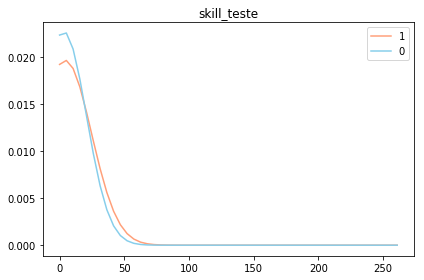

Label = 1 (Mean, Standard-Deviation): (4.32923673997, 20.3285235379)
Label = 0 (Mean, Standard-Deviation): (3.18432200002, 17.5983252145)
p-value: 9.74193121509e-06
Null hipothesis rejected



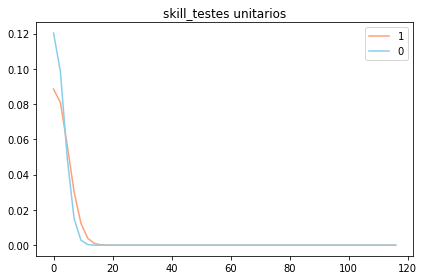

Label = 1 (Mean, Standard-Deviation): (0.377964639931, 4.49009325851)
Label = 0 (Mean, Standard-Deviation): (0.2169194486, 3.30749385187)
p-value: 0.000939896664863
Null hipothesis rejected



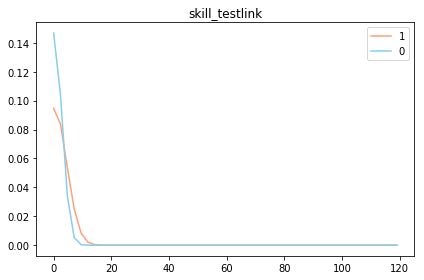

Label = 1 (Mean, Standard-Deviation): (0.276843467012, 4.20164788789)
Label = 0 (Mean, Standard-Deviation): (0.123415068697, 2.71477130931)
p-value: 0.000124673764337
Null hipothesis rejected



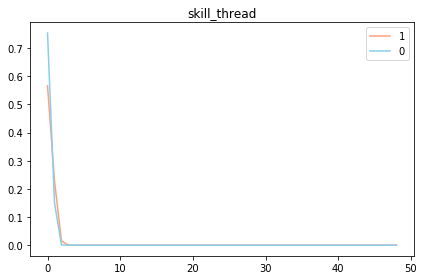

Label = 1 (Mean, Standard-Deviation): (0.01078050884, 0.705039607633)
Label = 0 (Mean, Standard-Deviation): (0.00896709647209, 0.529332497219)
p-value: 0.815944934525
Alternative hipothesis rejected



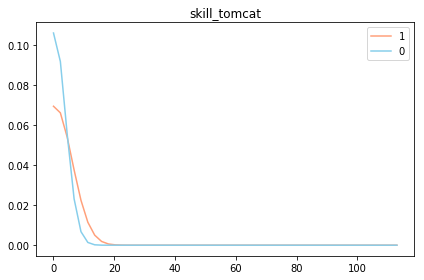

Label = 1 (Mean, Standard-Deviation): (0.424320827943, 5.72544415594)
Label = 0 (Mean, Standard-Deviation): (0.229995774278, 3.7524439728)
p-value: 0.000438164646722
Null hipothesis rejected



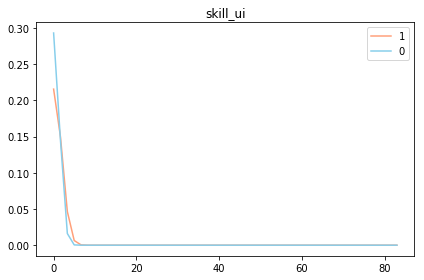

Label = 1 (Mean, Standard-Deviation): (0.0754635618801, 1.8502349858)
Label = 0 (Mean, Standard-Deviation): (0.04001587501, 1.36142274126)
p-value: 0.0769127134689
Alternative hipothesis rejected



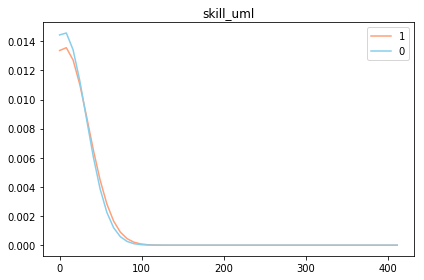

Label = 1 (Mean, Standard-Deviation): (5.61168607158, 29.3080898818)
Label = 0 (Mean, Standard-Deviation): (4.92525725511, 27.1848740355)
p-value: 0.0859825414812
Alternative hipothesis rejected



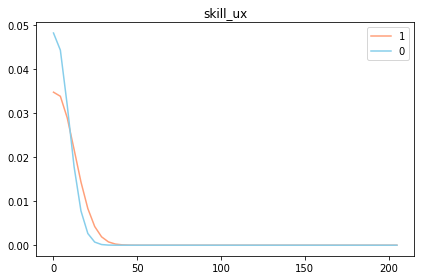

Label = 1 (Mean, Standard-Deviation): (1.19577404053, 11.3955711608)
Label = 0 (Mean, Standard-Deviation): (0.655600794893, 8.23619305136)
p-value: 8.37949861991e-06
Null hipothesis rejected



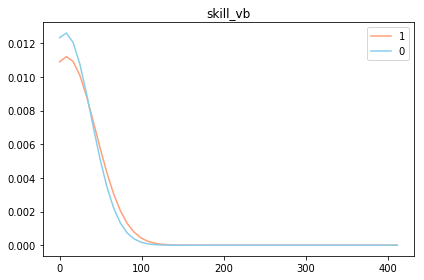

Label = 1 (Mean, Standard-Deviation): (8.37667097887, 35.5853623767)
Label = 0 (Mean, Standard-Deviation): (6.83503523339, 31.5947172855)
p-value: 0.000908457931291
Null hipothesis rejected



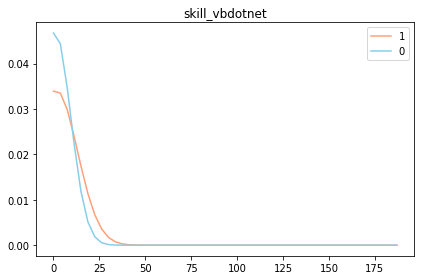

Label = 1 (Mean, Standard-Deviation): (1.40793445451, 11.6721990334)
Label = 0 (Mean, Standard-Deviation): (0.863844950262, 8.49034378819)
p-value: 1.34065844081e-05
Null hipothesis rejected



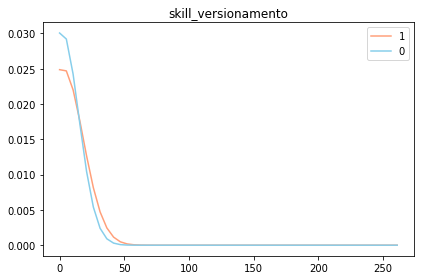

Label = 1 (Mean, Standard-Deviation): (2.27404053471, 15.8774053193)
Label = 0 (Mean, Standard-Deviation): (1.65420459347, 13.1654507006)
p-value: 0.00137355128155
Null hipothesis rejected



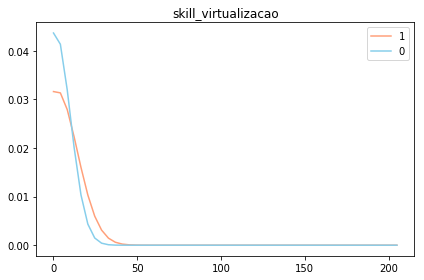

Label = 1 (Mean, Standard-Deviation): (1.72423458387, 12.4967119093)
Label = 0 (Mean, Standard-Deviation): (0.957301933553, 9.08357582162)
p-value: 9.71770984504e-09
Null hipothesis rejected



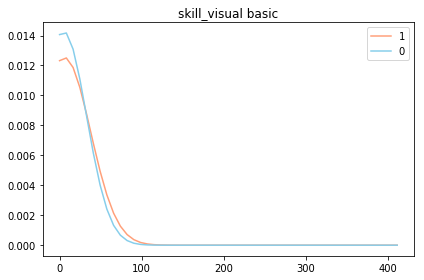

Label = 1 (Mean, Standard-Deviation): (5.89844760673, 31.8292568055)
Label = 0 (Mean, Standard-Deviation): (4.81183716123, 27.9516950395)
p-value: 0.00821916888816
Null hipothesis rejected



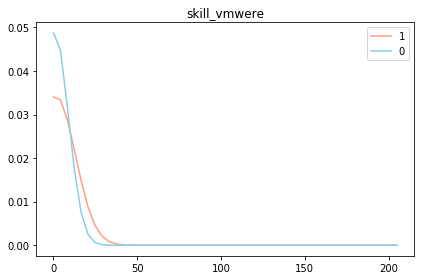

Label = 1 (Mean, Standard-Deviation): (1.40879689521, 11.6334794508)
Label = 0 (Mean, Standard-Deviation): (0.708817483069, 8.15768912436)
p-value: 5.61178207515e-09
Null hipothesis rejected



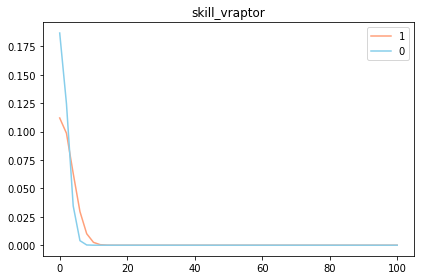

Label = 1 (Mean, Standard-Deviation): (0.191677447176, 3.55752937504)
Label = 0 (Mean, Standard-Deviation): (0.0789536198449, 2.13441567151)
p-value: 0.000339002106616
Null hipothesis rejected



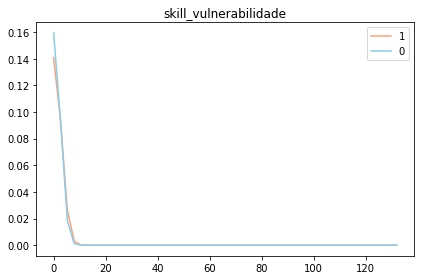

Label = 1 (Mean, Standard-Deviation): (0.0888313928417, 2.83008088185)
Label = 0 (Mean, Standard-Deviation): (0.0754731095604, 2.50254726332)
p-value: 0.716671982166
Alternative hipothesis rejected



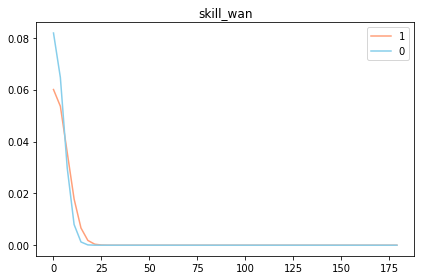

Label = 1 (Mean, Standard-Deviation): (0.395213454075, 6.63026782501)
Label = 0 (Mean, Standard-Deviation): (0.23283271851, 4.86713982135)
p-value: 0.0234191717579
Null hipothesis rejected



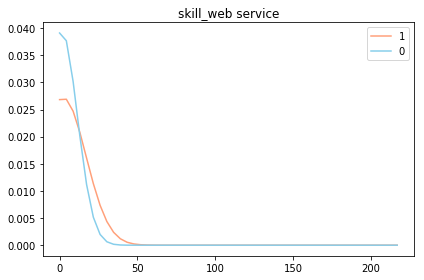

Label = 1 (Mean, Standard-Deviation): (2.29603277275, 14.6851720867)
Label = 0 (Mean, Standard-Deviation): (1.29590676001, 10.1158839894)
p-value: 1.8889544698e-11
Null hipothesis rejected



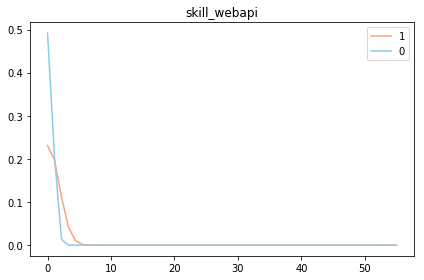

Label = 1 (Mean, Standard-Deviation): (0.116860715826, 1.72172917007)
Label = 0 (Mean, Standard-Deviation): (0.0274454938955, 0.810483380412)
p-value: 8.09488163373e-14
Null hipothesis rejected



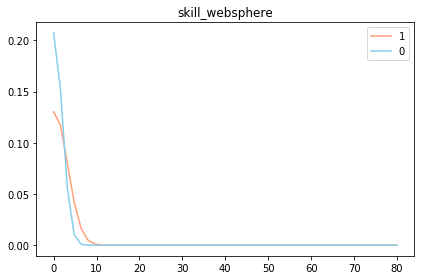

Label = 1 (Mean, Standard-Deviation): (0.180681328159, 3.05803394237)
Label = 0 (Mean, Standard-Deviation): (0.0831319453169, 1.92342777899)
p-value: 0.000576530656713
Null hipothesis rejected



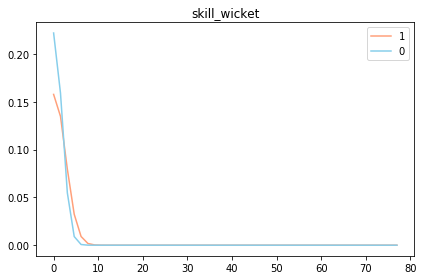

Label = 1 (Mean, Standard-Deviation): (0.119232427771, 2.52785535774)
Label = 0 (Mean, Standard-Deviation): (0.0724762731415, 1.79690055993)
p-value: 0.077154755739
Alternative hipothesis rejected



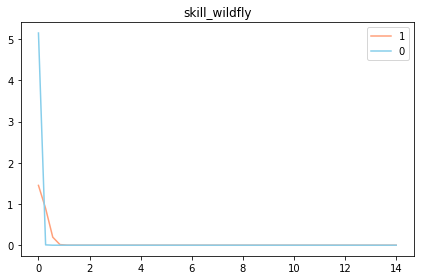

Label = 1 (Mean, Standard-Deviation): (0.00840879689521, 0.27496993325)
Label = 0 (Mean, Standard-Deviation): (0.000702383535673, 0.0775114612606)
p-value: 2.72263433049e-11
Null hipothesis rejected



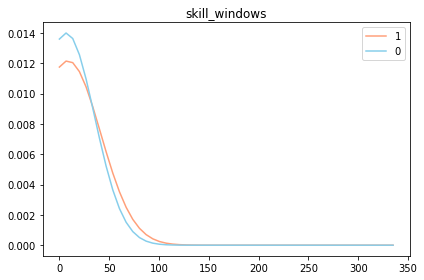

Label = 1 (Mean, Standard-Deviation): (8.67205692109, 32.7915529048)
Label = 0 (Mean, Standard-Deviation): (6.86361025137, 28.5054914096)
p-value: 1.61040404336e-05
Null hipothesis rejected



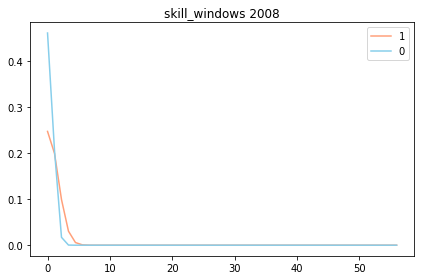

Label = 1 (Mean, Standard-Deviation): (0.0631737818025, 1.61015602738)
Label = 0 (Mean, Standard-Deviation): (0.0226841329846, 0.863769314619)
p-value: 0.00148416552454
Null hipothesis rejected



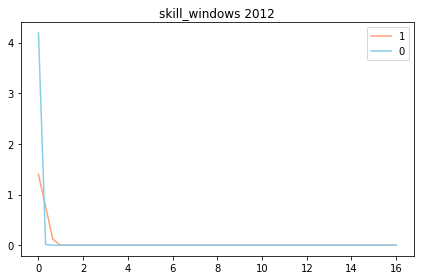

Label = 1 (Mean, Standard-Deviation): (0.00603708495041, 0.285419341384)
Label = 0 (Mean, Standard-Deviation): (0.000881691202503, 0.0952228638334)
p-value: 0.000268433507564
Null hipothesis rejected



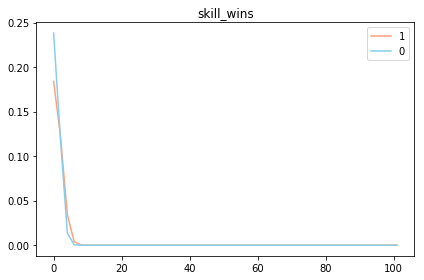

Label = 1 (Mean, Standard-Deviation): (0.0618801207417, 2.16628883852)
Label = 0 (Mean, Standard-Deviation): (0.041149396407, 1.67342870358)
p-value: 0.399898040349
Alternative hipothesis rejected



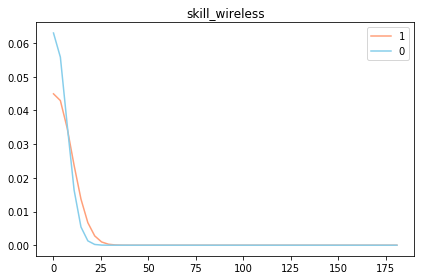

Label = 1 (Mean, Standard-Deviation): (0.829021129797, 8.83656177534)
Label = 0 (Mean, Standard-Deviation): (0.481433661874, 6.31276290888)
p-value: 0.000183936736841
Null hipothesis rejected



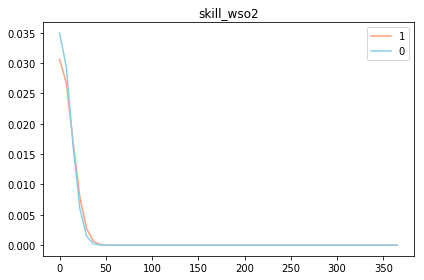

Label = 1 (Mean, Standard-Deviation): (0.508840017249, 13.0254762275)
Label = 0 (Mean, Standard-Deviation): (0.540669148803, 11.4015098038)
p-value: 0.849472035054
Alternative hipothesis rejected



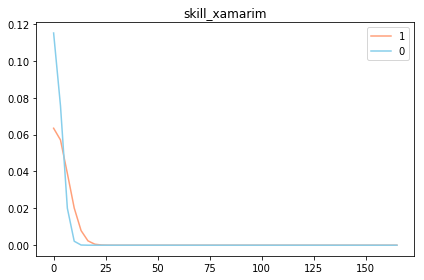

Label = 1 (Mean, Standard-Deviation): (0.391116860716, 6.27589957568)
Label = 0 (Mean, Standard-Deviation): (0.123645199237, 3.46393830845)
p-value: 1.64183189673e-07
Null hipothesis rejected



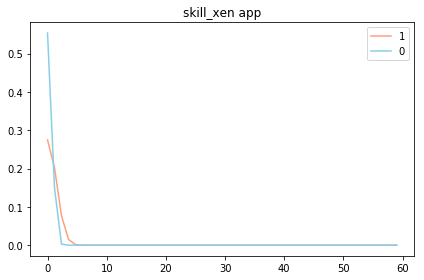

Label = 1 (Mean, Standard-Deviation): (0.0424752048297, 1.45172663288)
Label = 0 (Mean, Standard-Deviation): (0.0134789113626, 0.720418695768)
p-value: 0.00640175989096
Null hipothesis rejected



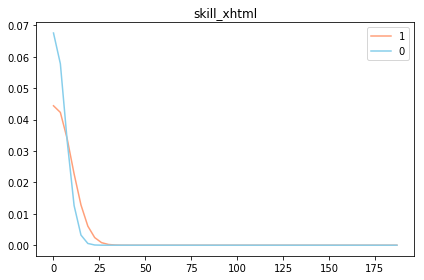

Label = 1 (Mean, Standard-Deviation): (0.823846485554, 8.95168241525)
Label = 0 (Mean, Standard-Deviation): (0.417404835597, 5.89171941607)
p-value: 2.81635651638e-06
Null hipothesis rejected



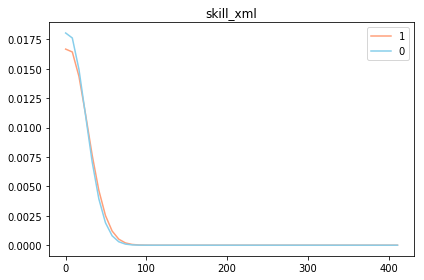

Label = 1 (Mean, Standard-Deviation): (3.10349288486, 23.7121788613)
Label = 0 (Mean, Standard-Deviation): (2.72343905252, 21.9323549391)
p-value: 0.238679466202
Alternative hipothesis rejected



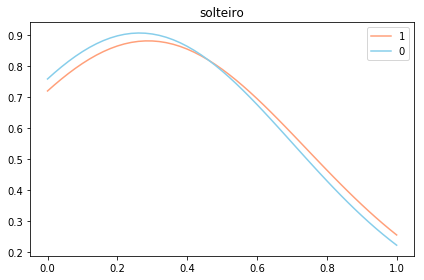

Label = 1 (Mean, Standard-Deviation): (0.288055196205, 0.452856931209)
Label = 0 (Mean, Standard-Deviation): (0.262907867838, 0.440212813156)
p-value: 0.000102350595733
Null hipothesis rejected



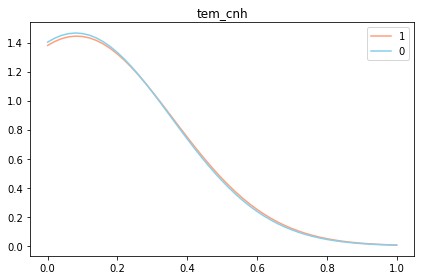

Label = 1 (Mean, Standard-Deviation): (0.0832255282449, 0.276222808061)
Label = 0 (Mean, Standard-Deviation): (0.0805856622392, 0.272197746649)
p-value: 0.509520006649
Alternative hipothesis rejected



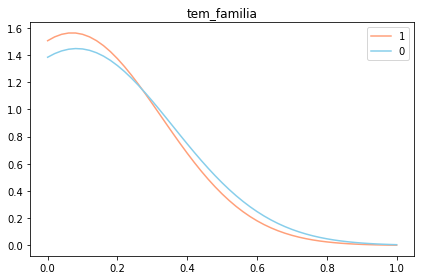

Label = 1 (Mean, Standard-Deviation): (0.0700733074601, 0.255270521294)
Label = 0 (Mean, Standard-Deviation): (0.0828338605969, 0.275630934649)
p-value: 0.00163665211689
Null hipothesis rejected



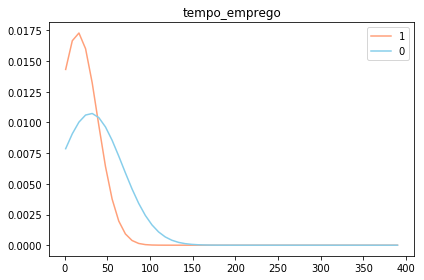

Label = 1 (Mean, Standard-Deviation): (15.2000862441, 23.0307663057)
Label = 0 (Mean, Standard-Deviation): (30.3393660275, 37.1259486326)
p-value: 1.56389951129e-169
Null hipothesis rejected



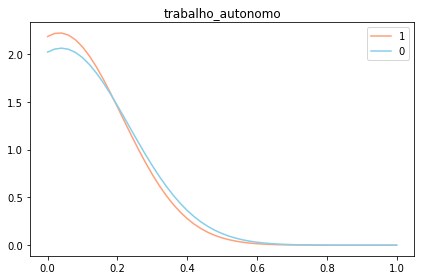

Label = 1 (Mean, Standard-Deviation): (0.0334195774041, 0.179729544734)
Label = 0 (Mean, Standard-Deviation): (0.0390245434507, 0.193653371928)
p-value: 0.0489675613977
Null hipothesis rejected

['cargo_estagiario', 'cargo_gerente', 'casado', 'curso_administracao', 'curso_engenharia', 'experiencia_meses', 'homem', 'idade', 'idioma-eo-fala', 'idioma-es-escreve', 'idioma-es-fala', 'idioma-es-le', 'loc-br-mg', 'loc-br-pe', 'loc-br-pi', 'loc-br-rj', 'skill_dotnet', 'skill_administracao', 'skill_administrativo', 'skill_ajax', 'skill_alocacao', 'skill_analise de requisitos', 'skill_analise de sistemas', 'skill_appliance', 'skill_arquitetura', 'skill_asp', 'skill_aspdotnet', 'skill_automatizacao de teste', 'skill_awt', 'skill_azure', 'skill_banco de dados', 'skill_big data', 'skill_bootstrap', 'skill_bpm', 'skill_business intelligence', 'skill_c', 'skill_csharp', 'skill_cpp', 'skill_cisco', 'skill_cloud computing', 'skill_comercial', 'skill_css', 'skill_cucumber', 'skill_data quality', 'skill

In [19]:
useful = []
for f in [x for x in df.columns if x != 'label']:
    f1 = [float(x) for x in df.where(df['label'] == 1).select(f).rdd.flatMap(lambda x: x).collect()]
    mu1 = np.mean(f1)
    sd1 = np.std(f1)    
    
    s0 = df.where(df.label == 0).select(f).sample(True, len(f1) / float(size), seed=my_seed)
    f0 = [float(x) for x in s0.rdd.flatMap(lambda x: x).collect()]
    mu0 = np.mean(f0)
    sd0= np.std(f0)  
    
    num_bins = 50
    fig, ax = plt.subplots()
    
    # the histogram of the data
    hist, bins = np.histogram(f1 + f0, num_bins)
    
    # add a 'best fit' line
    y1 = ((1 / (np.sqrt(2 * np.pi) * sd1)) *
         np.exp(-0.5 * (1 / sd1 * (bins - mu1))**2))
    ax.plot(bins, y1, 'lightsalmon', label='1')    
    
    y0 = ((1 / (np.sqrt(2 * np.pi) * sd0)) *
         np.exp(-0.5 * (1 / sd0 * (bins - mu0))**2)) 
    ax.plot(bins, y0, 'skyblue', label='0')
    
    ax.legend()
    
#     ax.set_xlabel('Smarts')
#     ax.set_ylabel('Probability density')
    ax.set_title(f)

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()
    
    print('Label = 1 (Mean, Standard-Deviation): (' + str(mu1) + ', ' + str(sd1) + ')')
    print('Label = 0 (Mean, Standard-Deviation): (' + str(mu0) + ', ' + str(sd0) + ')')

    D, p = stats.ttest_ind(f0, f1)
    
    print('p-value: ' + str(p))
    
    if p < 0.05:
        print('Null hipothesis rejected')
        useful.append(f)
    else:
        print('Alternative hipothesis rejected')
    
    print
print(useful)

In [20]:
cols = df.columns
cols.remove('label')

assembler = VectorAssembler(inputCols=cols,outputCol='features')
df_pca = assembler.transform(df)
df_pca.cache()

DataFrame[cargo_analista: double, cargo_consultor: double, cargo_engenheiro: double, cargo_estagiario: double, cargo_gerente: double, casado: int, curso_administracao: double, curso_computacao: double, curso_engenharia: double, experiencia_meses: int, homem: double, idade: int, idioma-de-escreve: double, idioma-de-fala: double, idioma-de-le: double, idioma-en-escreve: double, idioma-en-fala: double, idioma-en-le: double, idioma-eo-fala: double, idioma-es-escreve: double, idioma-es-fala: double, idioma-es-le: double, idioma-fr-escreve: double, idioma-fr-fala: double, idioma-fr-le: double, idioma-he-fala: double, idioma-it-escreve: double, idioma-it-fala: double, idioma-it-le: double, idioma-ja-escreve: double, idioma-ja-fala: double, idioma-ja-le: double, idioma-nativo-en: double, idioma-nativo-es: double, idioma-nativo-pt: double, idioma-pt-escreve: double, idioma-pt-fala: double, idioma-pt-le: double, idioma-ru-escreve: double, idioma-ru-fala: double, idioma-ru-le: double, idioma-tota

In [21]:
n = 3 # number of components for PCA
classes = 2 # label: 0, 1

pca = PCA(k=n, inputCol="features", outputCol="pca_features")

# useful = [] # useful discriminant variables
for cl in range(classes):
    print('Label = ' + str(cl))
    print
    
    model = pca.fit(df_pca.where(df_pca.label == cl))
    pca_pd = pd.DataFrame.from_records(model.pc.toArray(), columns=['pc-' + str(k + 1) for k in range(n)])    
    pca_pd = pd.concat([pca_pd, pd.Series(cols, name='cols')], axis=1)
    
    for i in range(n):
        component =  'pc-' + str(i + 1)
        print(component)
        print
        p = pca_pd.loc[np.abs(pca_pd[component]) > 0.1].sort_values(by=component)
        p = p[['cols', component]]
        print(p.to_string(index=False))
#         useful.extend(pca_pd['cols'].tolist())
#         print(pca_pd)
        print
    print(model.explainedVariance)
    print
    print

# useful = list(set(useful))
# useful.sort()
# print(useful)

Label = 0

pc-1

cols      pc-1
sal_pretendido  0.999993

pc-2

cols      pc-2
idade  0.995048

pc-3

cols      pc-3
                   skill_html  0.105512
                    skill_rup  0.106090
                    skill_db2  0.110261
       skill_markup languages  0.111311
           skill_visual basic  0.112076
               skill_ms visio  0.112788
                   skill_itil  0.113487
                skill_windows  0.113893
skill_microsoft system center  0.115039
                  skill_scrum  0.116295
     skill_metodologias ageis  0.119840
                    skill_pmp  0.120779
                 skill_office  0.122260
              skill_modelagem  0.122995
                    skill_uml  0.125080
              skill_comercial  0.130486
             skill_ms project  0.131165
                  skill_cobol  0.133309
             skill_sql server  0.135781
      skill_java desktop (se)  0.137496
                   skill_java  0.138800
  skill_business intelligence  0.139381
   

In [22]:
df_pca.unpersist()

DataFrame[cargo_analista: double, cargo_consultor: double, cargo_engenheiro: double, cargo_estagiario: double, cargo_gerente: double, casado: int, curso_administracao: double, curso_computacao: double, curso_engenharia: double, experiencia_meses: int, homem: double, idade: int, idioma-de-escreve: double, idioma-de-fala: double, idioma-de-le: double, idioma-en-escreve: double, idioma-en-fala: double, idioma-en-le: double, idioma-eo-fala: double, idioma-es-escreve: double, idioma-es-fala: double, idioma-es-le: double, idioma-fr-escreve: double, idioma-fr-fala: double, idioma-fr-le: double, idioma-he-fala: double, idioma-it-escreve: double, idioma-it-fala: double, idioma-it-le: double, idioma-ja-escreve: double, idioma-ja-fala: double, idioma-ja-le: double, idioma-nativo-en: double, idioma-nativo-es: double, idioma-nativo-pt: double, idioma-pt-escreve: double, idioma-pt-fala: double, idioma-pt-le: double, idioma-ru-escreve: double, idioma-ru-fala: double, idioma-ru-le: double, idioma-tota

In [29]:
# Identify multicolinearity using Variance Inflation Factor (VIF)

MAX_VIF = 5
unnecessary = ['label']

found = True
i = 0
while found:
    i += 1
    print(i)
    
    temp_app = app.drop(*unnecessary)
    temp_cols = temp_app.columns
    
    vifs = []
    for c in temp_cols:
        features = [x for x in temp_cols if x != c]
        
        assembler = VectorAssembler(inputCols=features,outputCol='features')
        temp_df = assembler.transform(temp_app)
        temp_df = temp_df.select(['features', c])
        
        lr = LinearRegression(featuresCol='features', labelCol=c, maxIter=10)
        lrModel = lr.fit(temp_df)
        trainingSummary = lrModel.summary
        if np.abs(trainingSummary.r2) == 1:
            vif = np.float('inf')
        else:
            vif =  1 / float(1 - trainingSummary.r2)
        
        vifs.append({'col' : c, 'vif' : vif})
    vifs_pd = pd.DataFrame(vifs)
    print(vifs_pd)
        
    idx = vifs_pd['vif'].idxmax()
    k = vifs_pd.loc[idx, 'col']
    v = vifs_pd.loc[idx, 'vif']
    
    print(k + ' ' + str(v))
    
    found = False    
    if v > MAX_VIF:
        unnecessary.append(k)
        found = True

1
cargo_analista
['cargo_analista', 'cargo_consultor', 'cargo_engenheiro', 'cargo_estagiario', 'cargo_gerente', 'casado', 'curso_administracao', 'curso_computacao', 'curso_engenharia', 'experiencia_meses', 'homem', 'idade', 'idioma-de-escreve', 'idioma-de-fala', 'idioma-de-le', 'idioma-en-escreve', 'idioma-en-fala', 'idioma-en-le', 'idioma-eo-fala', 'idioma-es-escreve', 'idioma-es-fala', 'idioma-es-le', 'idioma-fr-escreve', 'idioma-fr-fala', 'idioma-fr-le', 'idioma-he-fala', 'idioma-it-escreve', 'idioma-it-fala', 'idioma-it-le', 'idioma-ja-escreve', 'idioma-ja-fala', 'idioma-ja-le', 'idioma-nativo-en', 'idioma-nativo-es', 'idioma-nativo-pt', 'idioma-pt-escreve', 'idioma-pt-fala', 'idioma-pt-le', 'idioma-ru-escreve', 'idioma-ru-fala', 'idioma-ru-le', 'idioma-total', 'idioma-ve-fala', 'idioma-zh-fala', 'loc-br-am', 'loc-br-ap', 'loc-br-ba', 'loc-br-ce', 'loc-br-df', 'loc-br-es', 'loc-br-go', 'loc-br-mg', 'loc-br-ms', 'loc-br-pa', 'loc-br-pb', 'loc-br-pe', 'loc-br-pi', 'loc-br-rj', 'loc-b

IllegalArgumentException: u'Field "cargo_engenheiro" does not exist.'

In [ ]:
sc.stop()

In [25]:
temp_cols

['cargo_analista',
 'cargo_consultor',
 'cargo_engenheiro',
 'cargo_estagiario',
 'cargo_gerente',
 'casado',
 'curso_administracao',
 'curso_computacao',
 'curso_engenharia',
 'experiencia_meses',
 'homem',
 'idade',
 'idioma-de-escreve',
 'idioma-de-fala',
 'idioma-de-le',
 'idioma-en-escreve',
 'idioma-en-fala',
 'idioma-en-le',
 'idioma-eo-fala',
 'idioma-es-escreve',
 'idioma-es-fala',
 'idioma-es-le',
 'idioma-fr-escreve',
 'idioma-fr-fala',
 'idioma-fr-le',
 'idioma-he-fala',
 'idioma-it-escreve',
 'idioma-it-fala',
 'idioma-it-le',
 'idioma-ja-escreve',
 'idioma-ja-fala',
 'idioma-ja-le',
 'idioma-nativo-en',
 'idioma-nativo-es',
 'idioma-nativo-pt',
 'idioma-pt-escreve',
 'idioma-pt-fala',
 'idioma-pt-le',
 'idioma-ru-escreve',
 'idioma-ru-fala',
 'idioma-ru-le',
 'idioma-total',
 'idioma-ve-fala',
 'idioma-zh-fala',
 'loc-br-am',
 'loc-br-ap',
 'loc-br-ba',
 'loc-br-ce',
 'loc-br-df',
 'loc-br-es',
 'loc-br-go',
 'loc-br-mg',
 'loc-br-ms',
 'loc-br-pa',
 'loc-br-pb',
 'loc-br